**Mount Google Drive**

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**UnZip Files**

In [ ]:
!unzip -u "/content/drive/My Drive/garbage-dataset.zip" -d "/content/drive/My Drive/"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1893.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1894.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1895.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1897.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1898.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1899.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1901.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1902.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1906.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1908.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1909.jpg  
  inflating: /content/drive/My Drive/garbage-dataset/paper/paper_1910.jpg  
  inflating: /content/drive/My Drive/

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Paths to your dataset
base_dir = '/content/drive/My Drive/garbage-dataset'

# Image dimensions and batch size
img_height, img_width = 227, 227
batch_size = 32

# Data augmentation and preparation with only rotation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Reserve 20% of data for validation
)

**Loading the training images and validation images**

In [ ]:
train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 9087 images belonging to 6 classes.
Found 2271 images belonging to 6 classes.


In [ ]:
from tensorflow.keras.applications import DenseNet121

# Load the DenseNet121 model with pre-trained weights, excluding the top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)  # 6 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=val_generator
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


284/284 ━━━━━━━━━━━━━━━━━━━━ 3307s 11s/step - accuracy: 0.7870 - loss: 0.5783 - val_accuracy: 0.9128 - val_loss: 0.2425
Epoch 2/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 2307s 8s/step - accuracy: 0.9140 - loss: 0.2341 - val_accuracy: 0.9256 - val_loss: 0.2125
Epoch 3/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 2284s 8s/step - accuracy: 0.9293 - loss: 0.1894 - val_accuracy: 0.9185 - val_loss: 0.2197
Epoch 4/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 2332s 8s/step - accuracy: 0.9359 - loss: 0.1770 - val_accuracy: 0.9221 - val_loss: 0.2018
Epoch 5/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 2313s 8s/step - accuracy: 0.9386 - loss: 0.1659 - val_accuracy: 0.9366 - val_loss: 0.1899
Epoch 6/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 2350s 8s/step - accuracy: 0.9512 - loss: 0.1303 - val_accuracy: 0.9379 - val_loss: 0.1703
Epoch 7/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 2322s 8s/step - accuracy: 0.9558 - loss: 0.1222 - val_accuracy: 0.9379 - val_loss: 0.1725
Epoch 8/10
284/284 ━━━━━━━━━━━━━━━━━━━━ 2300s 8s/step - accuracy: 0.9495 - loss: 0.1463 - val_accura

In [ ]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(val_generator)
print(f'Validation accuracy: {val_acc:.2f}')

71/71 ━━━━━━━━━━━━━━━━━━━━ 450s 6s/step - accuracy: 0.9394 - loss: 0.1634
Validation accuracy: 0.94


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step


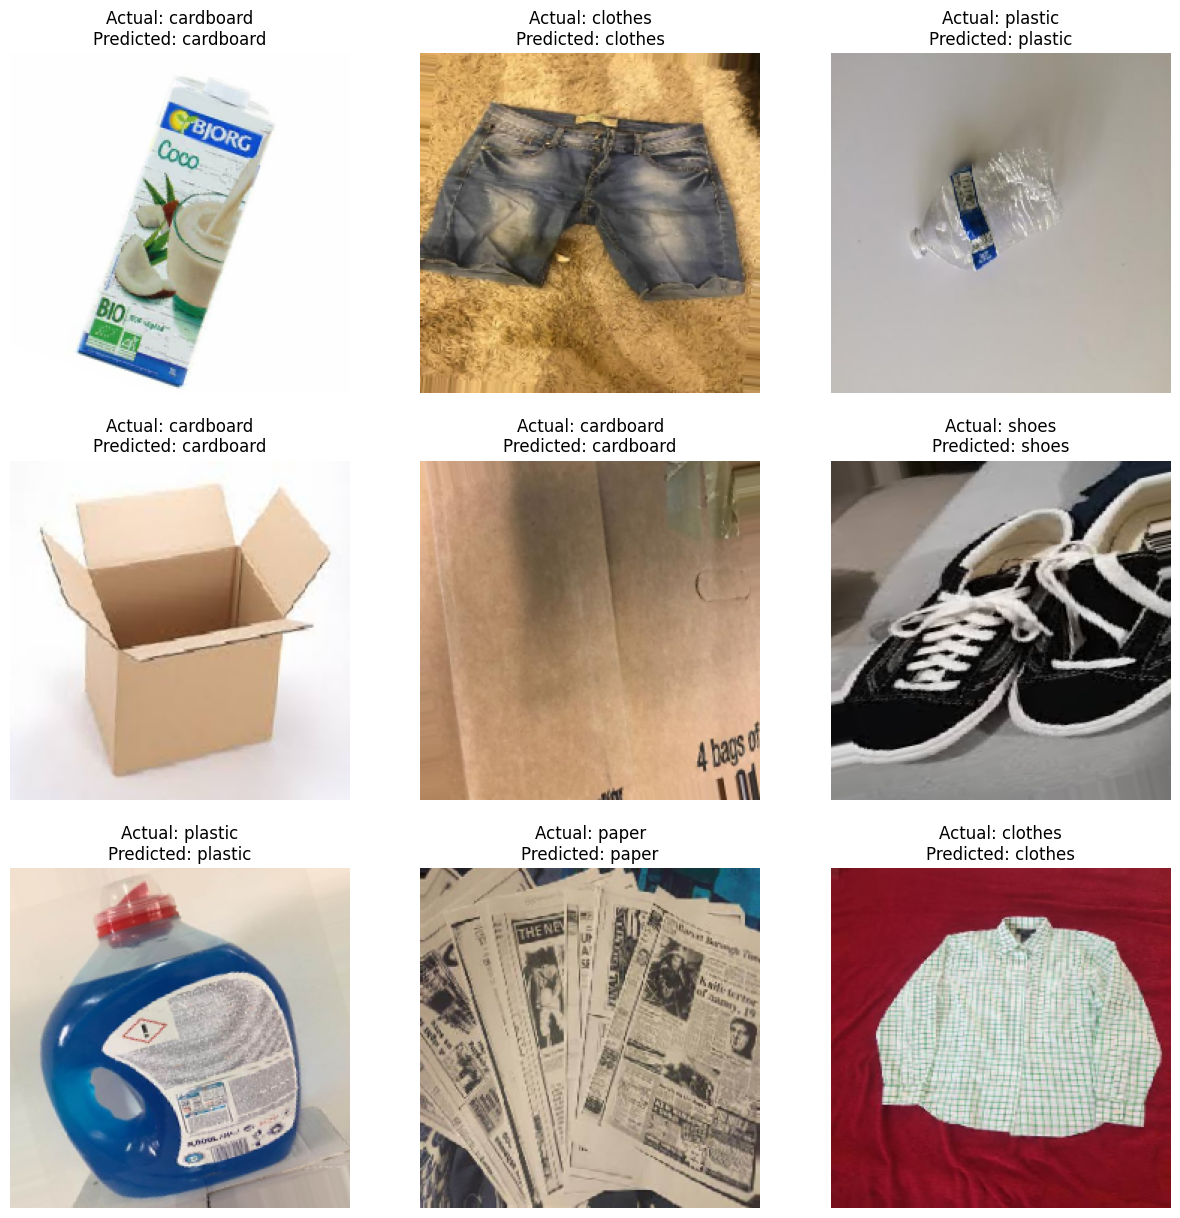

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Assuming you have a class_names list defined based on your dataset
class_names = list(train_generator.class_indices.keys())  # Extract class names from train_generator

# Function to make predictions and return the predicted class and confidence
def predict(model, image):
    # Expand dimensions to match the model's input
    image = tf.expand_dims(image, axis=0)

    # Make predictions
    predictions = model.predict(image)

    # Get the predicted class and confidence
    predicted_class = class_names[tf.argmax(predictions[0])]
    confidence = round(100 * tf.reduce_max(predictions[0]).numpy(), 2)

    return predicted_class, confidence

# Visualize predictions on 9 images from the validation dataset
plt.figure(figsize=(15, 15))
for images, labels in val_generator:  # Loop through one batch of images and labels from validation dataset
    for i in range(9):  # Display 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])

        # Get the model's prediction and confidence
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[tf.argmax(labels[i])]

        # Set the title of the subplot
        plt.title(f"Actual: {actual_class}\nPredicted: {predicted_class}")

        plt.axis("off")  # Hide the axes

    break  # Only take the first batch of images

plt.show()  # Show the plot


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 227, 227, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d            │ (None, 233, 233, 3)    │              0 │ input_layer[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 114, 114, 64)   │          9,408 │ zero_padding2d[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 114, 114, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 114, 114, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_1          │ (None, 116, 116, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 57, 57, 64)     │              0 │ zero_padding2d_1[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 57, 57, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 57, 57, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 57, 57, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 57, 57, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 57, 57, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 57, 57, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 57, 57, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block2_0_bn    

 Total params: 8,621,140 (32.89 MB)

 Trainable params: 527,878 (2.01 MB)

 Non-trainable params: 7,037,504 (26.85 MB)

 Optimizer params: 1,055,758 (4.03 MB)

71/71 ━━━━━━━━━━━━━━━━━━━━ 461s 6s/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 455s 6s/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 459s 6s/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 457s 6s/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 461s 6s/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 455s 6s/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 462s 6s/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 456s 6s/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 460s 6s/step
71/71 ━━━━━━━━━━━━━━━━━━━━ 455s 6s/step


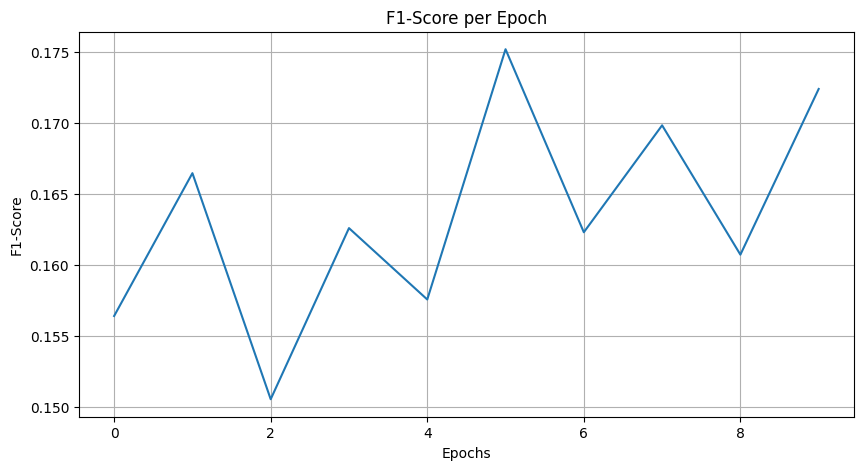

In [ ]:
from sklearn.metrics import f1_score

# Initialize list to store F1 scores per epoch
f1_scores = []

# After each epoch, calculate F1-score on validation set
for epoch in range(len(history.history['accuracy'])):
    # Predict validation set at this epoch
    val_predictions = model.predict(val_generator)
    y_pred_epoch = np.argmax(val_predictions, axis=1)
    f1 = f1_score(y_true, y_pred_epoch, average='macro')  # You can also use 'weighted'
    f1_scores.append(f1)

# Plot F1-score per epoch
plt.figure(figsize=(10, 5))
plt.plot(f1_scores)
plt.title('F1-Score per Epoch')
plt.xlabel('Epochs')
plt.ylabel('F1-Score')
plt.grid(True)
plt.show()


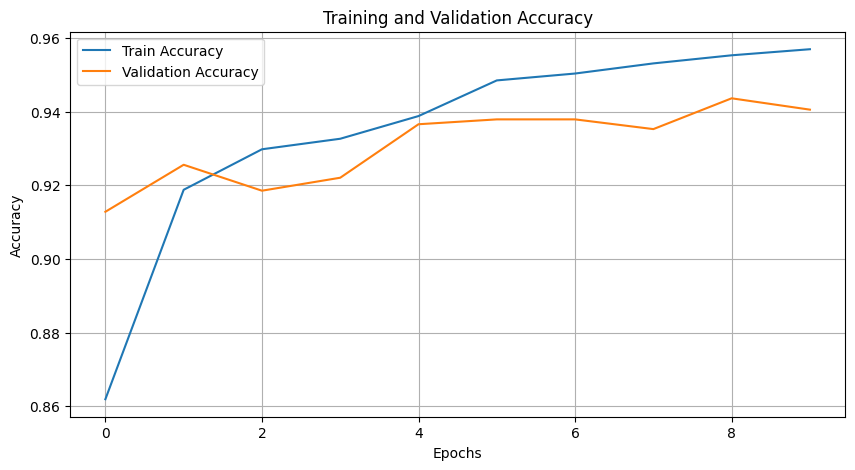

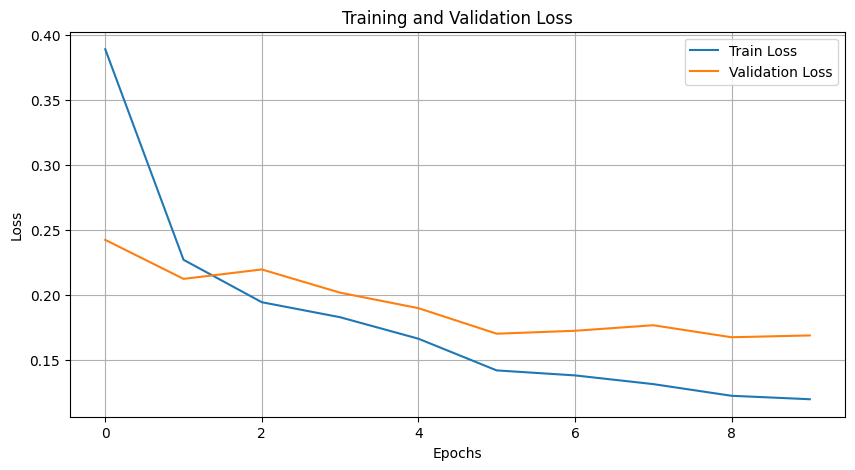

In [ ]:
import matplotlib.pyplot as plt

# Plot Training & Validation Accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot Training & Validation Loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


71/71 ━━━━━━━━━━━━━━━━━━━━ 456s 6s/step


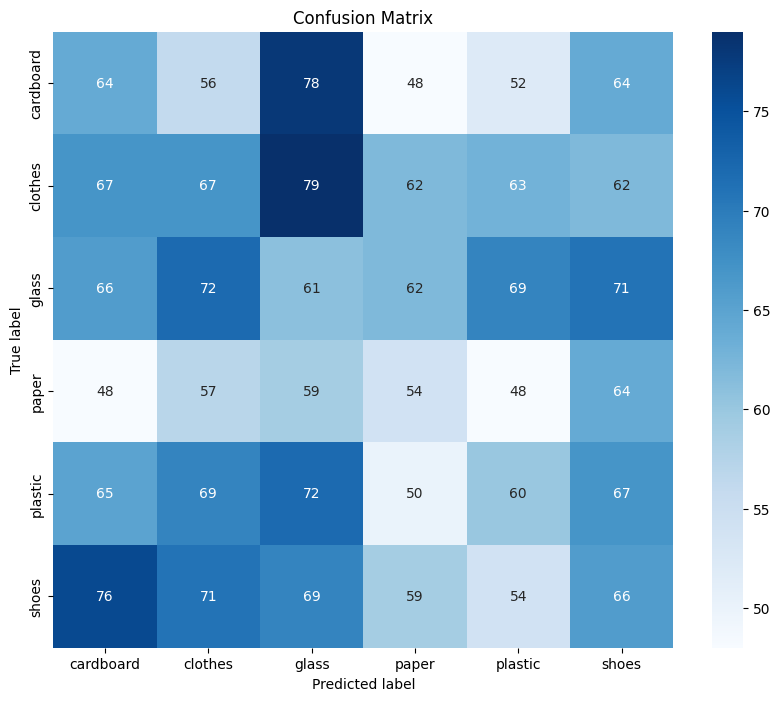

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate predictions from the model
val_predictions = model.predict(val_generator)
y_pred = np.argmax(val_predictions, axis=1)
y_true = val_generator.classes  # True labels from validation generator

# Confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=val_generator.class_indices.keys(),
            yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


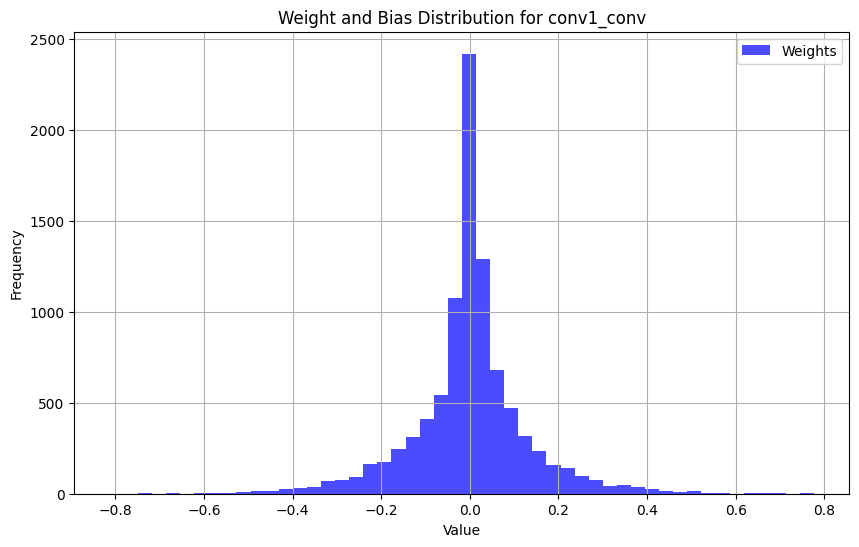

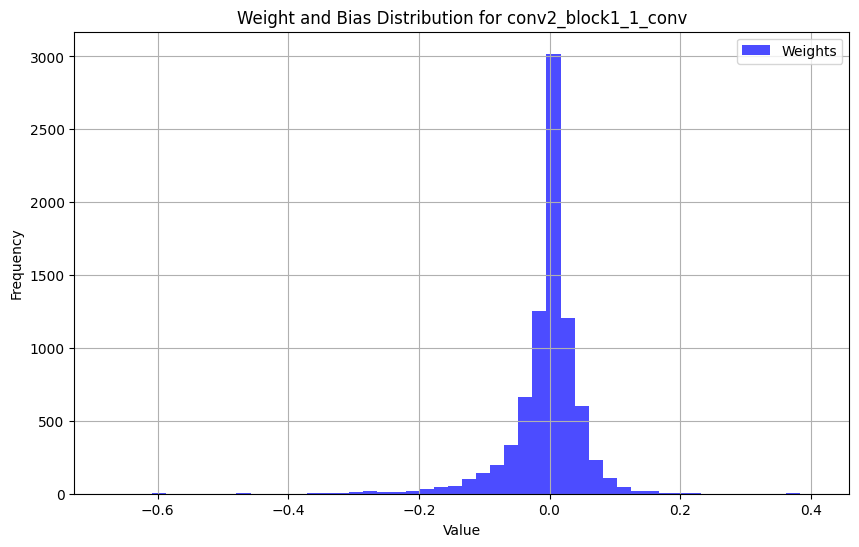

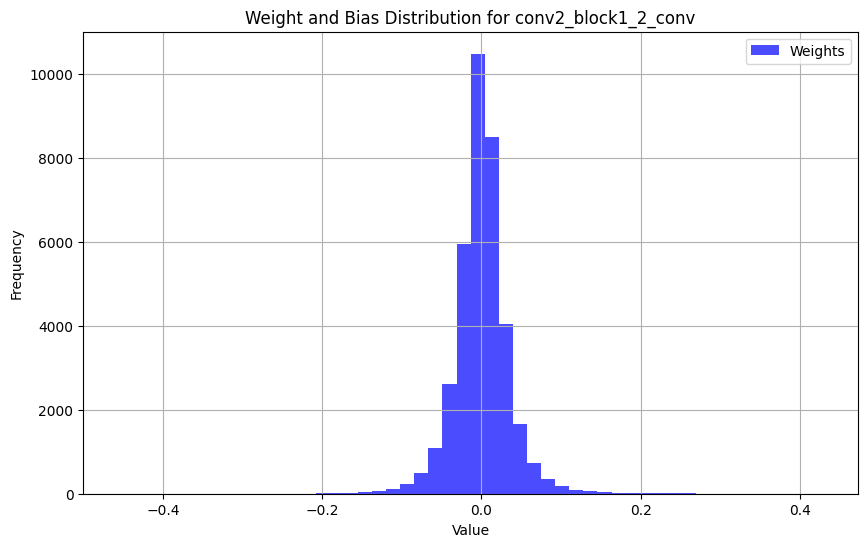

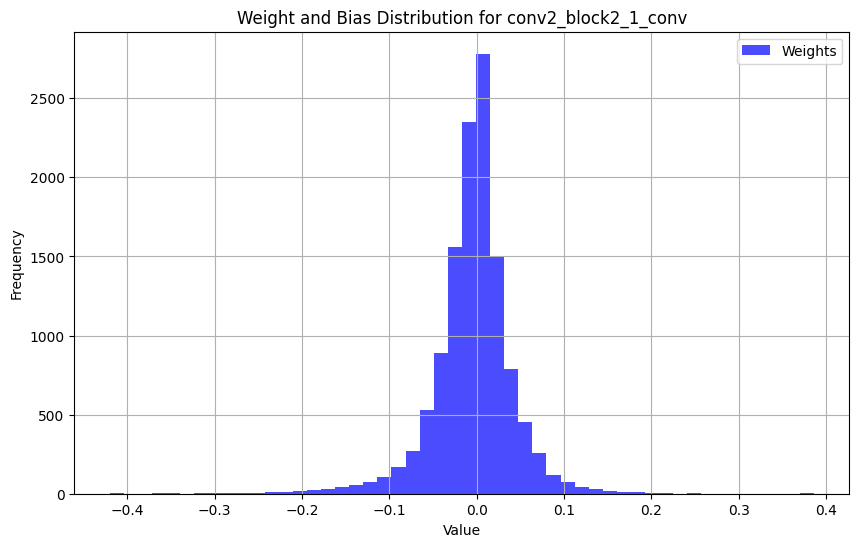

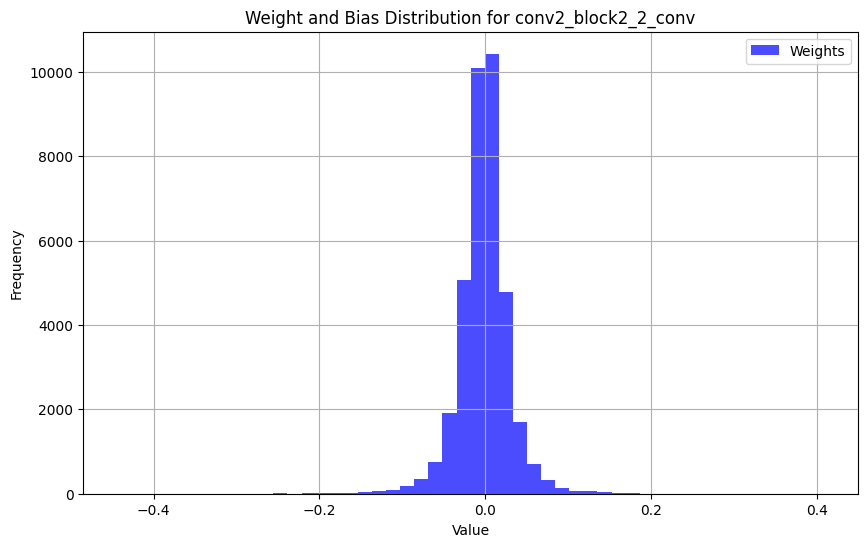

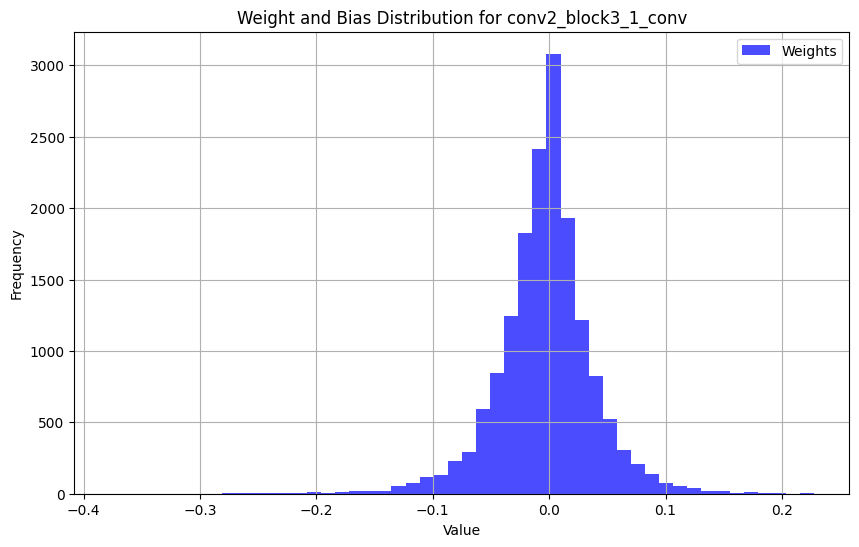

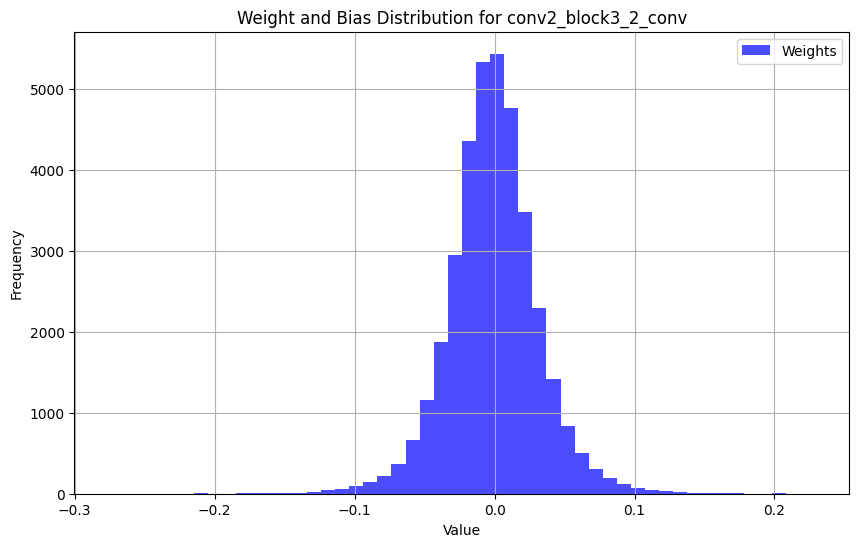

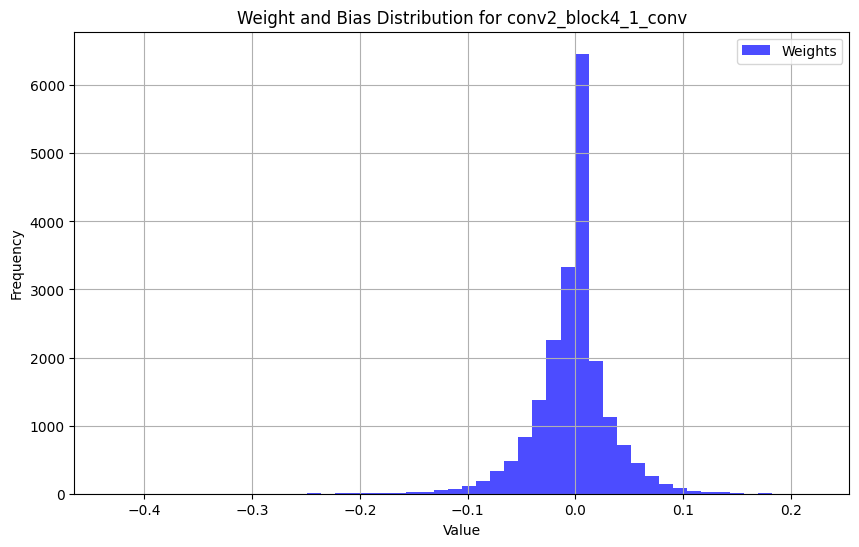

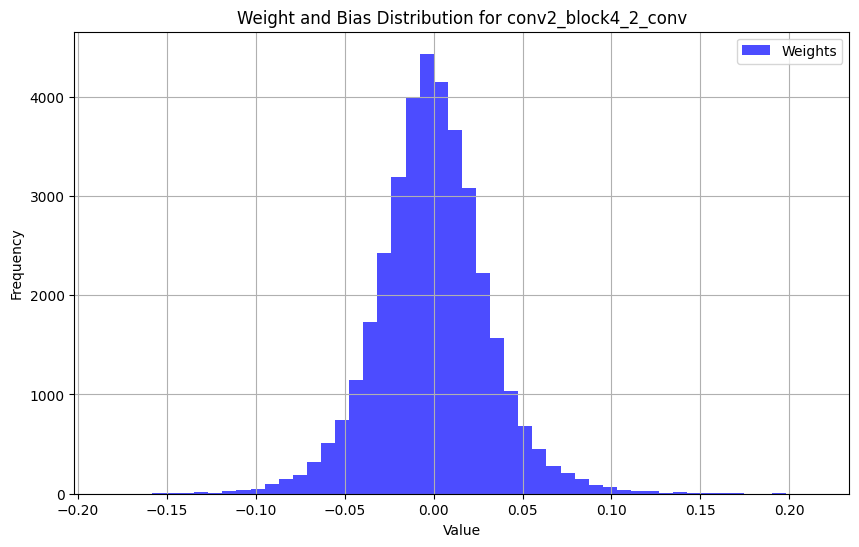

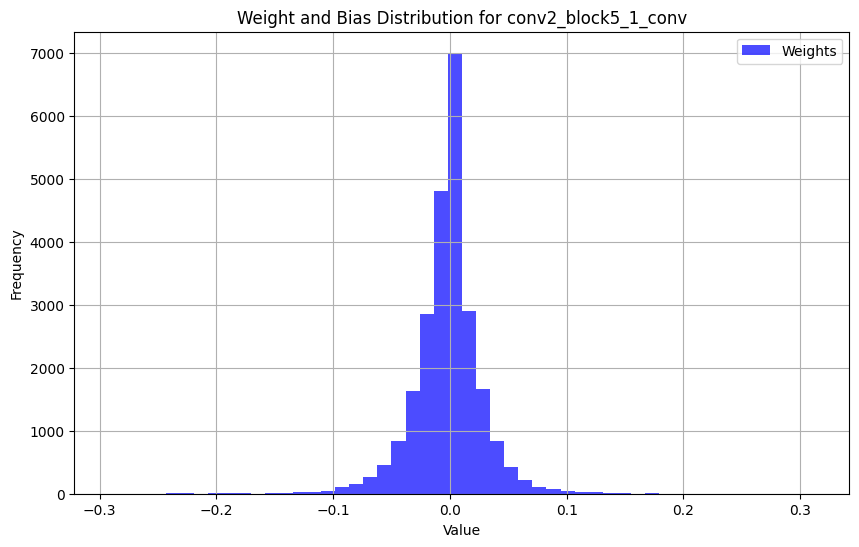

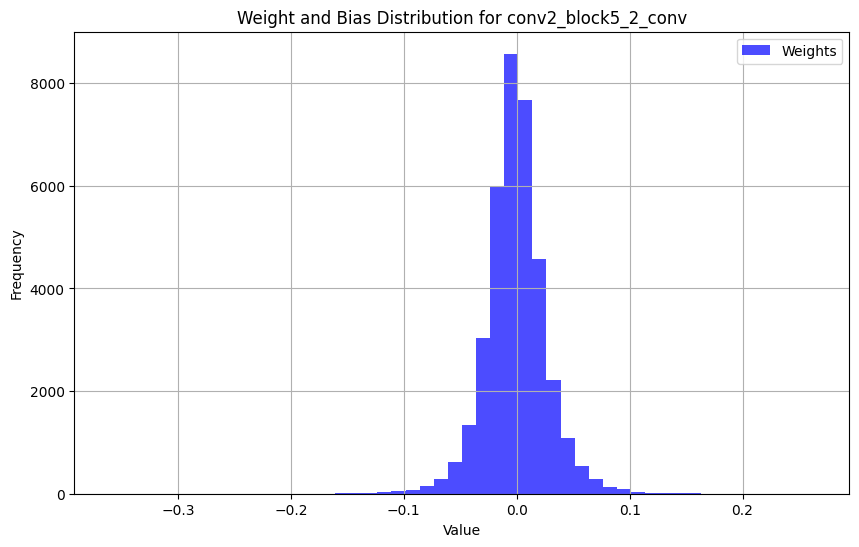

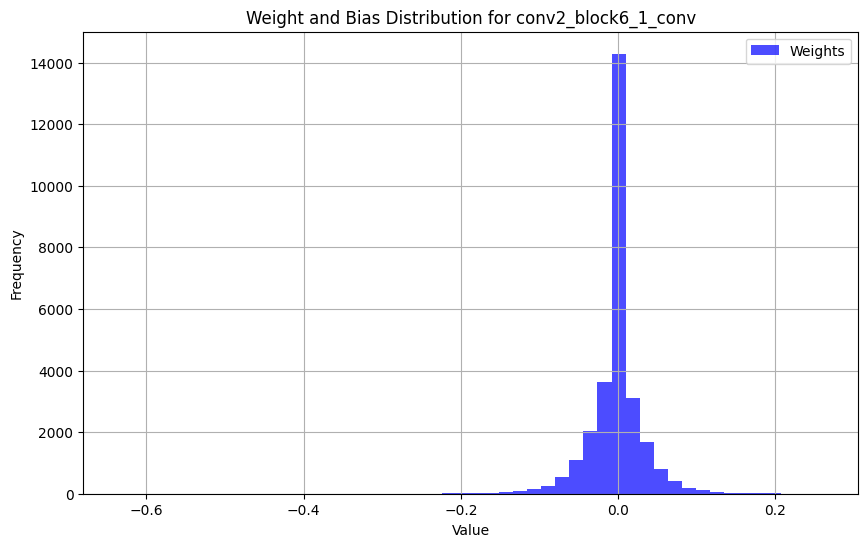

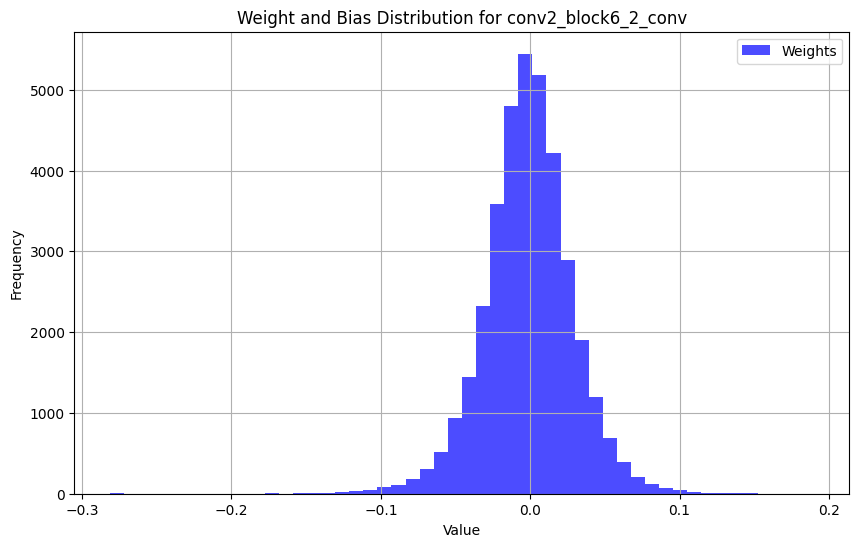

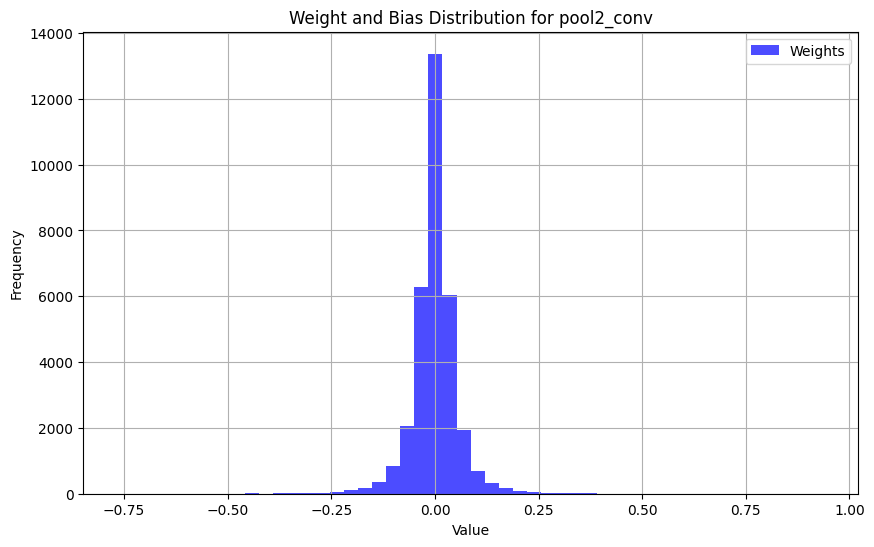

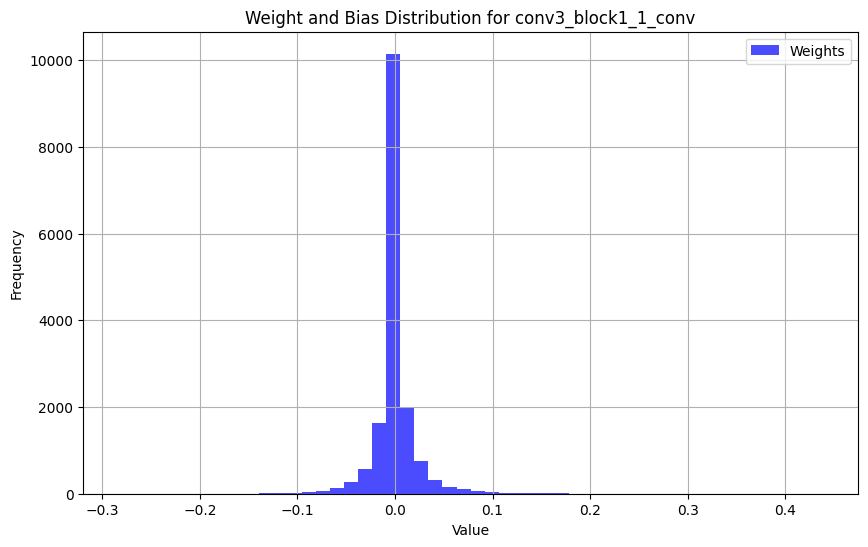

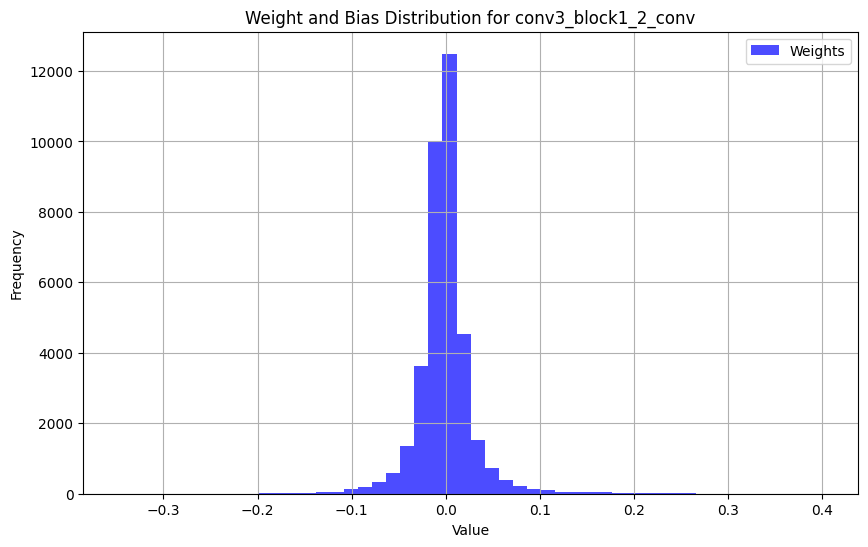

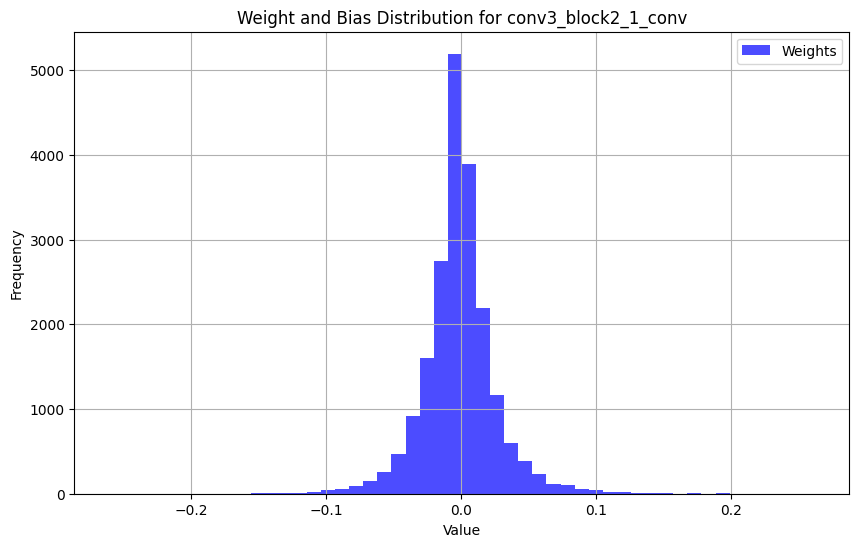

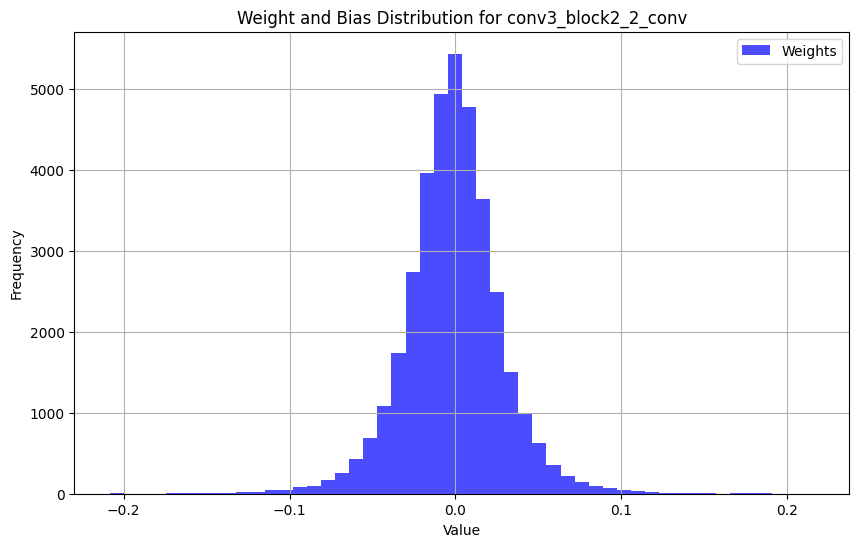

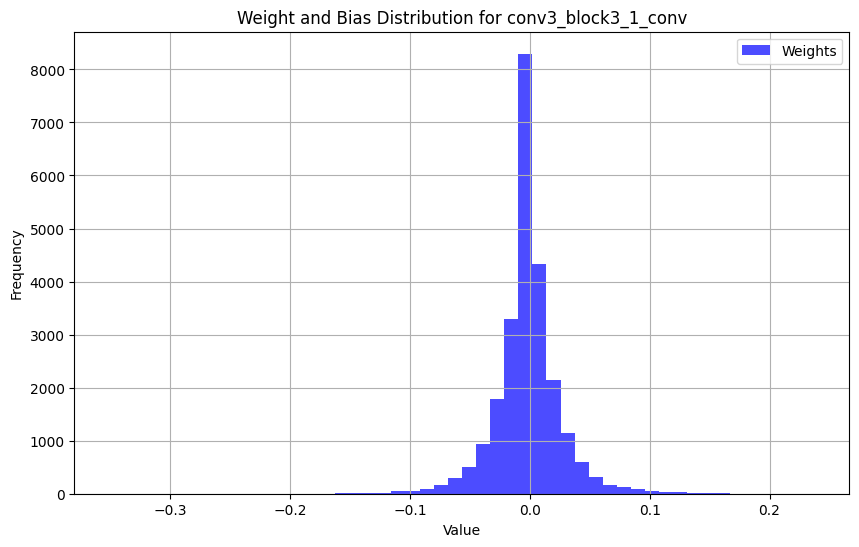

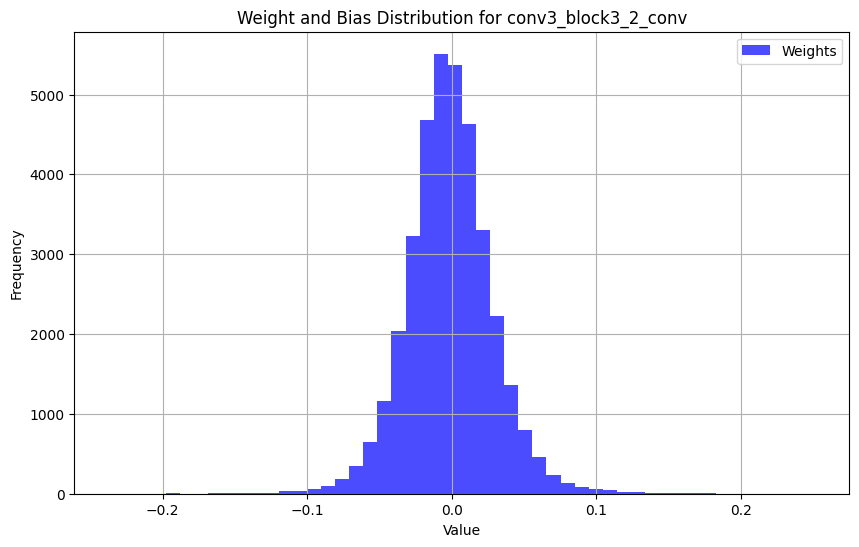

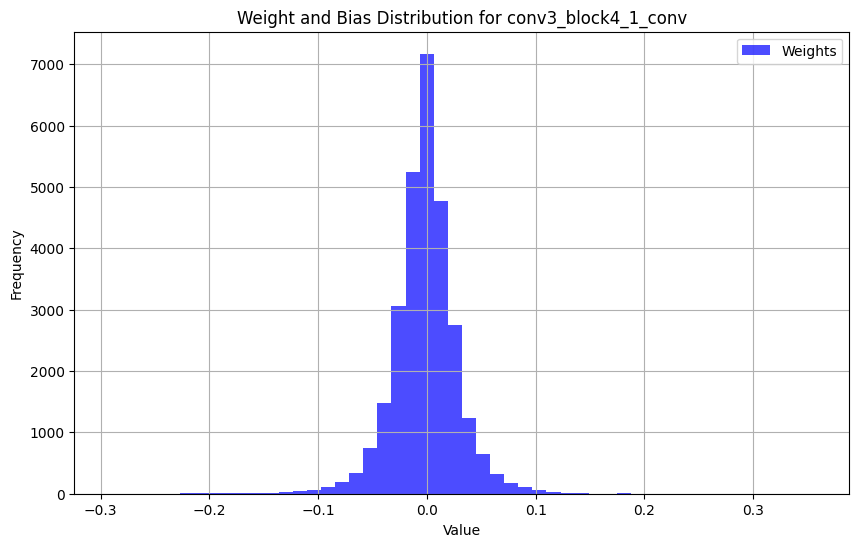

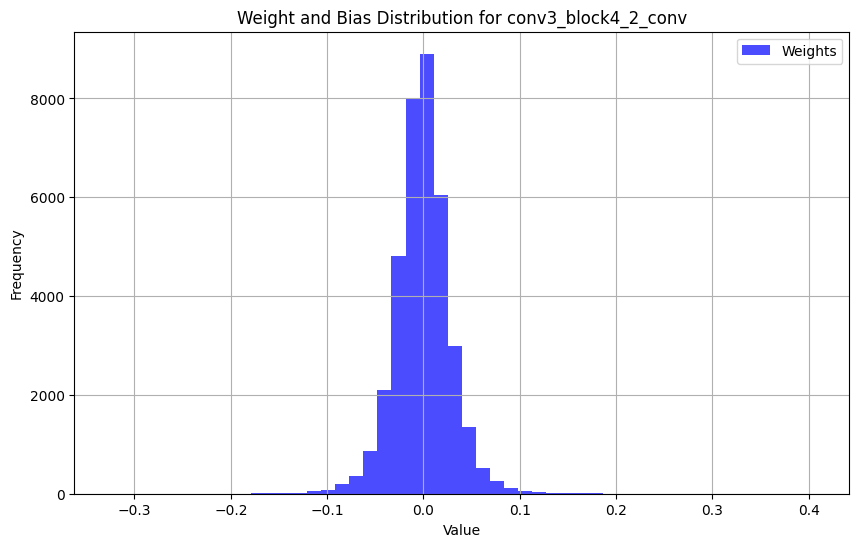

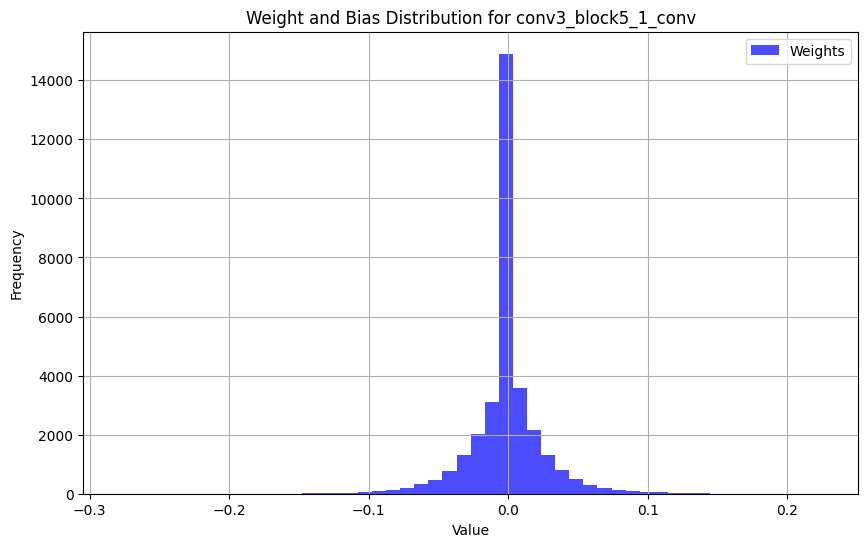

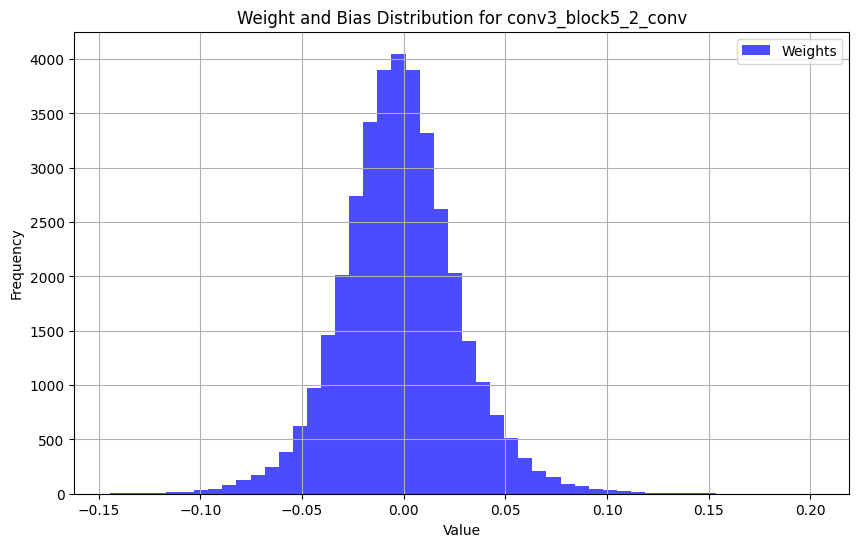

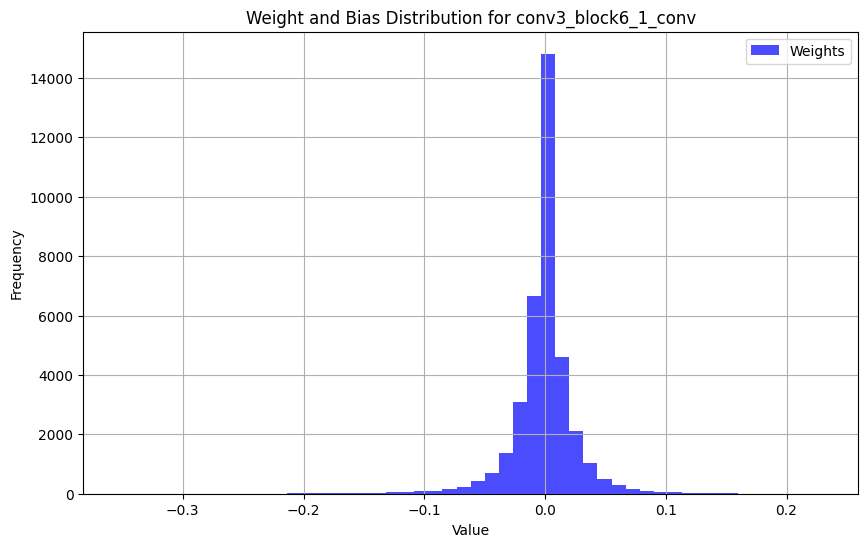

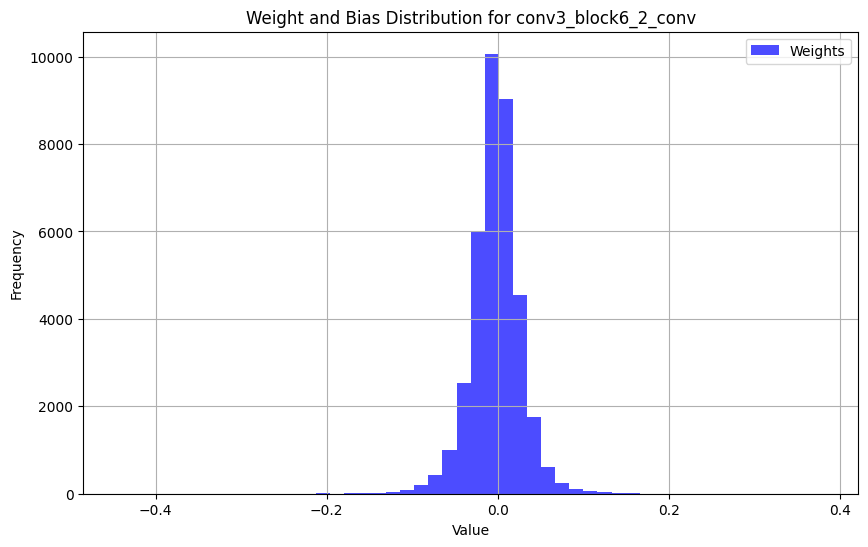

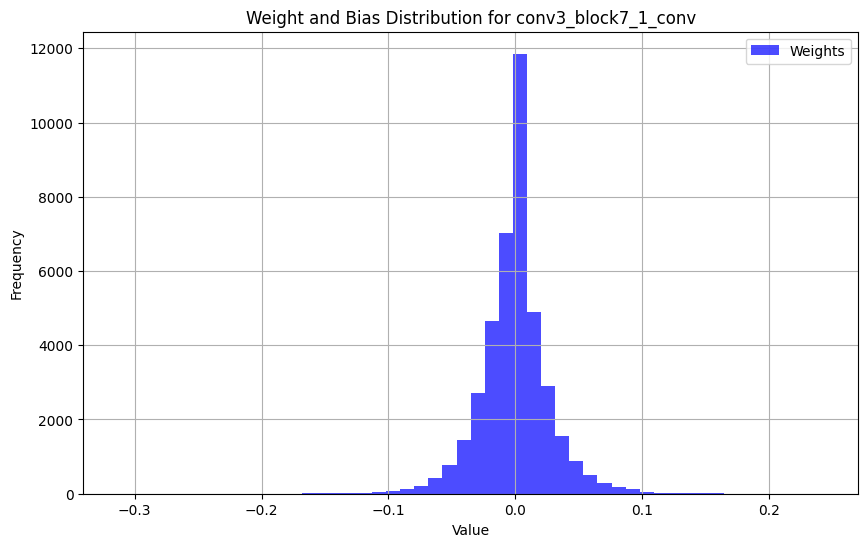

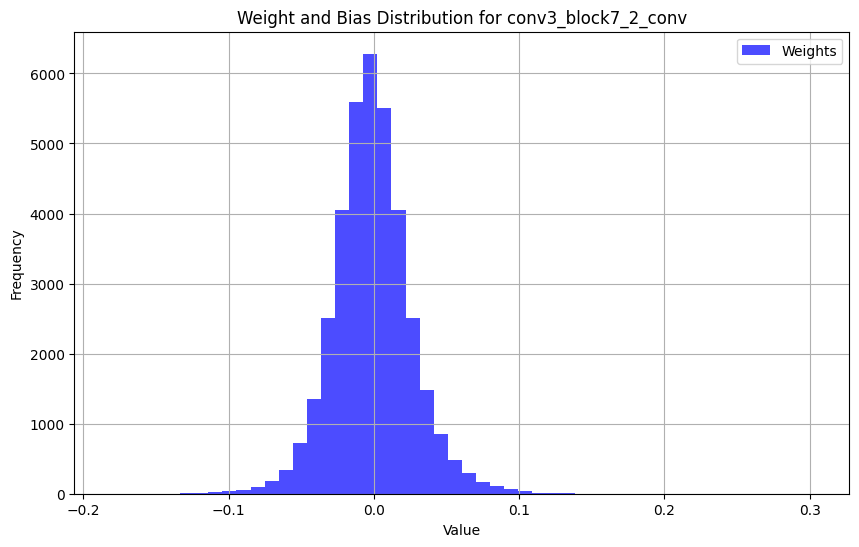

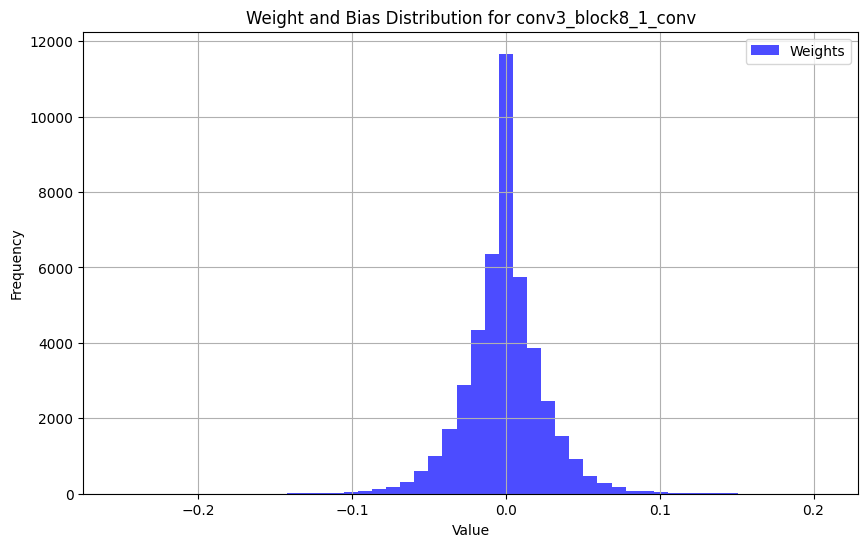

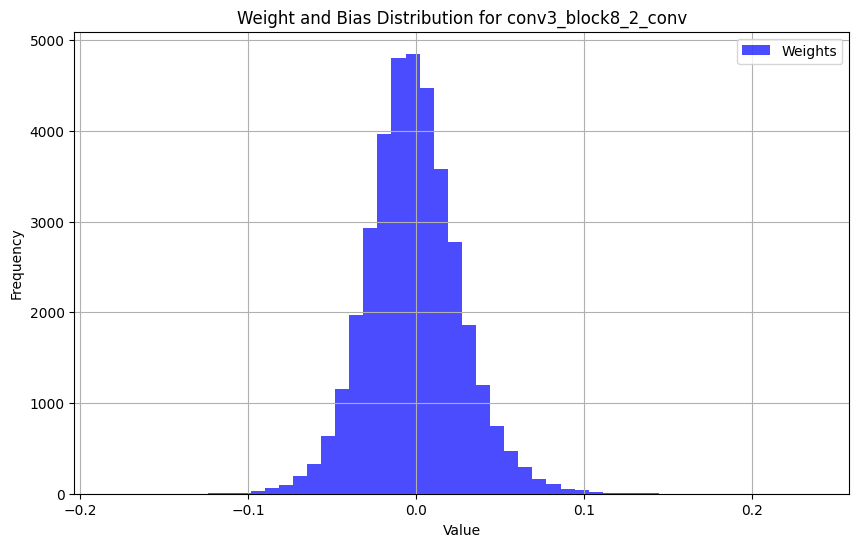

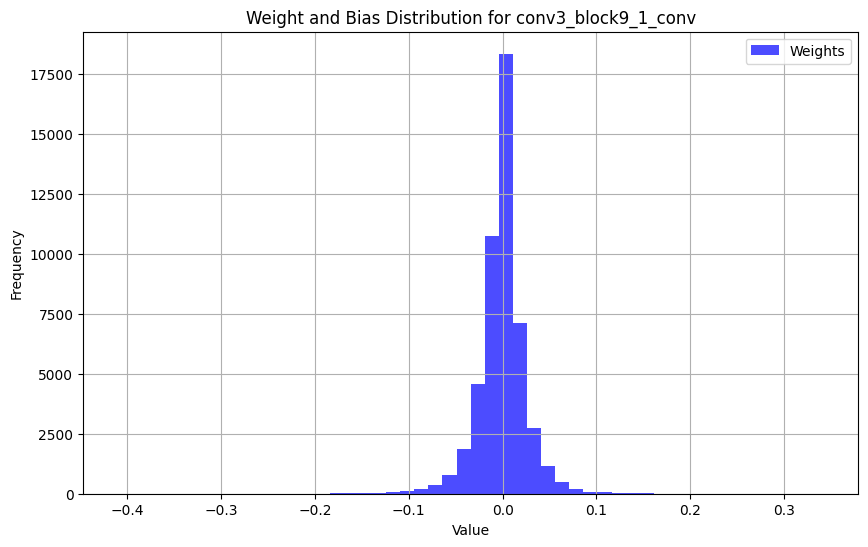

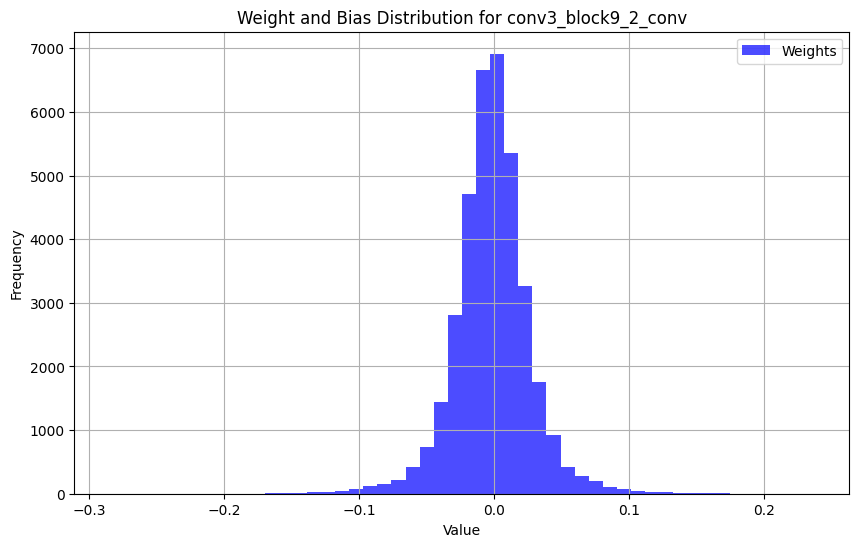

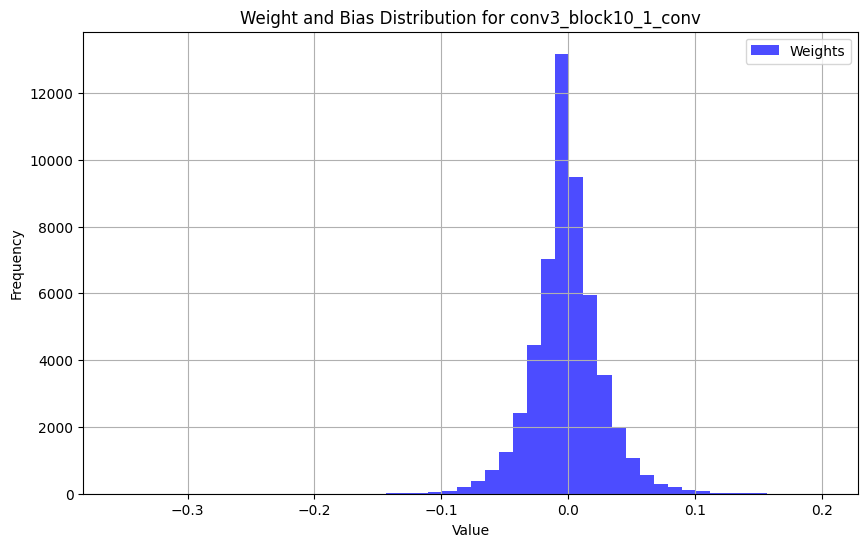

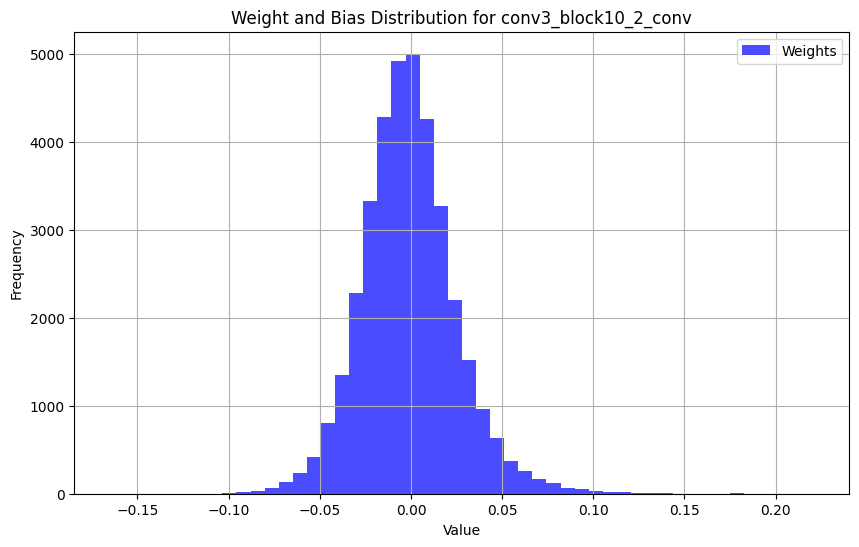

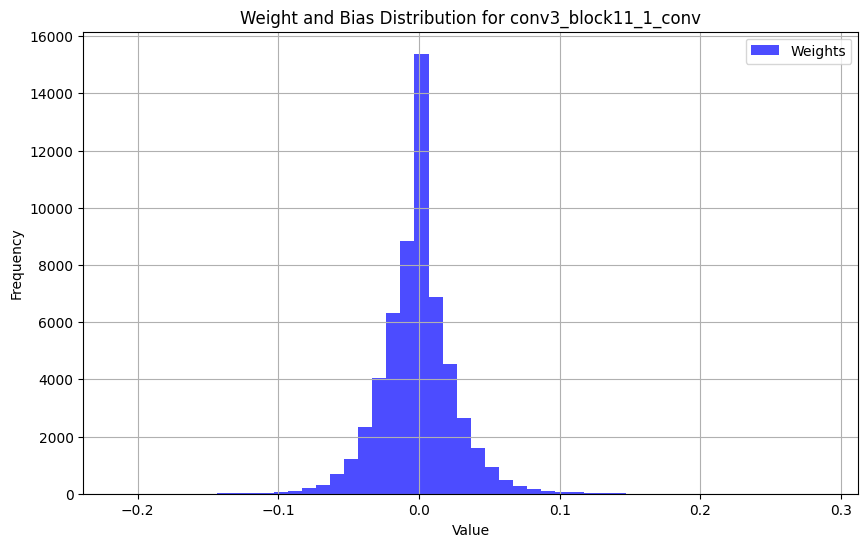

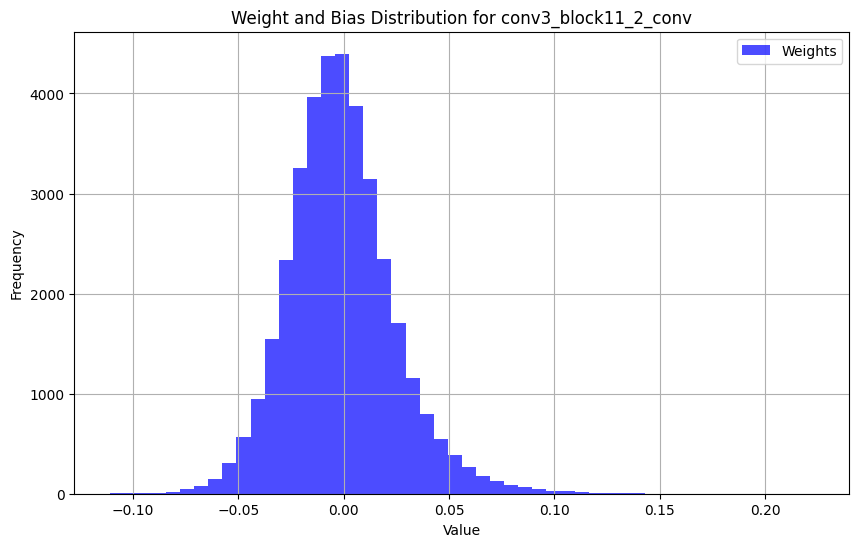

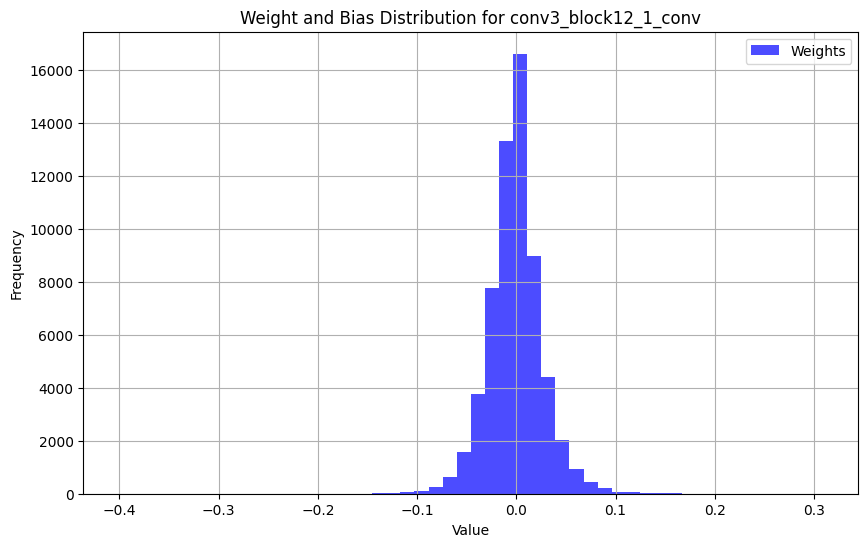

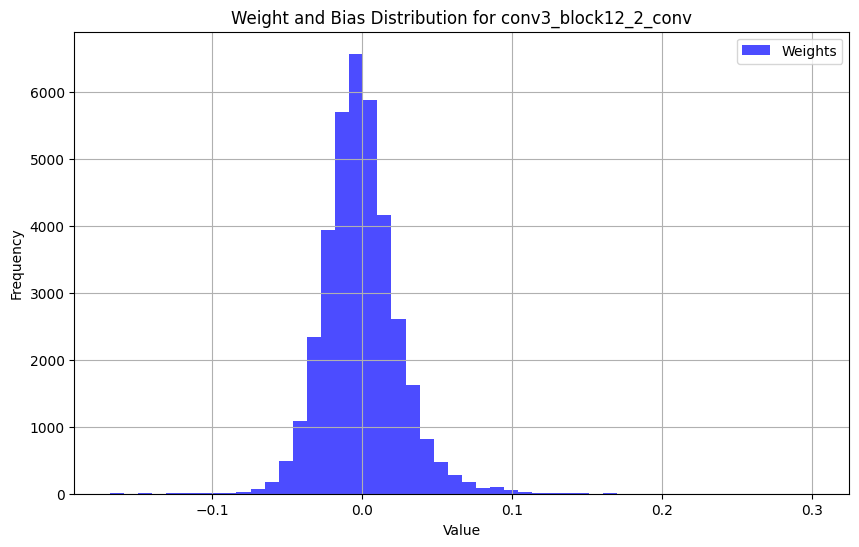

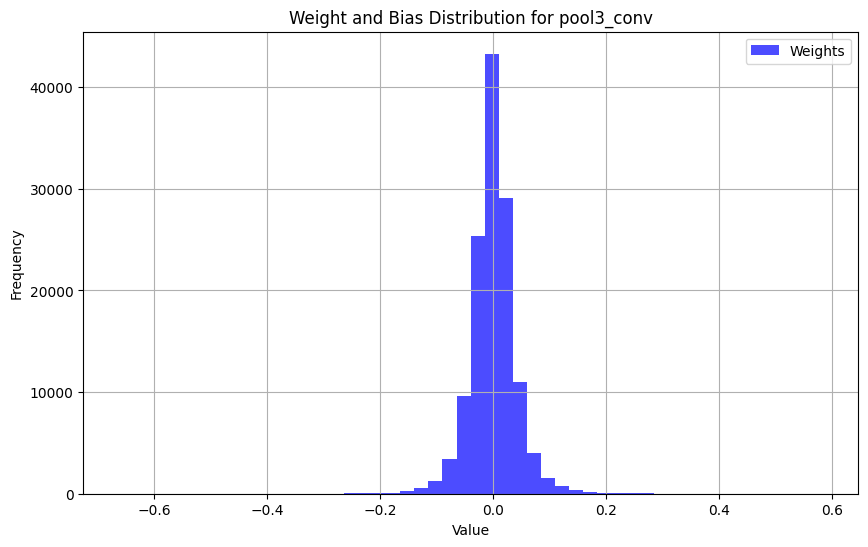

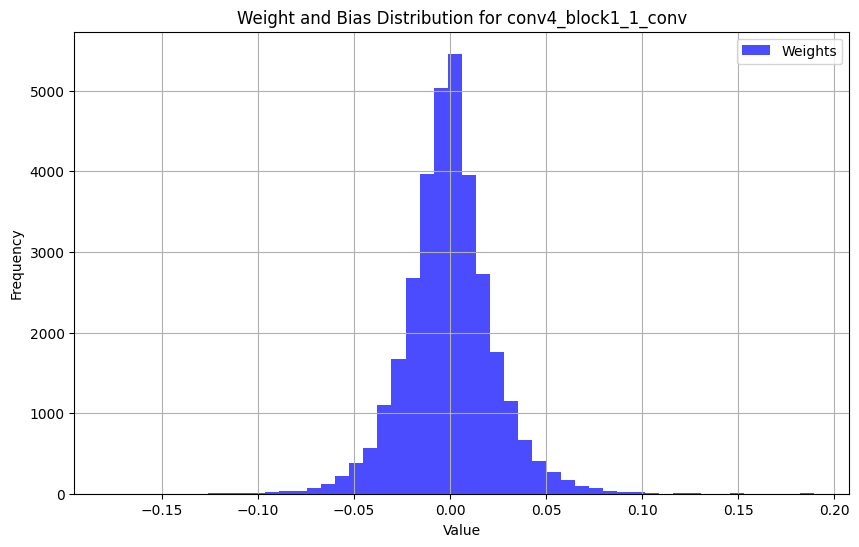

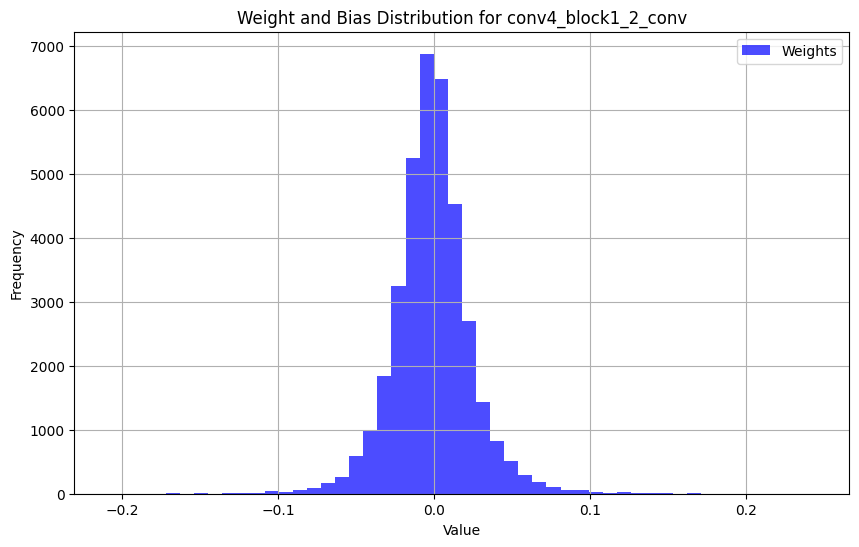

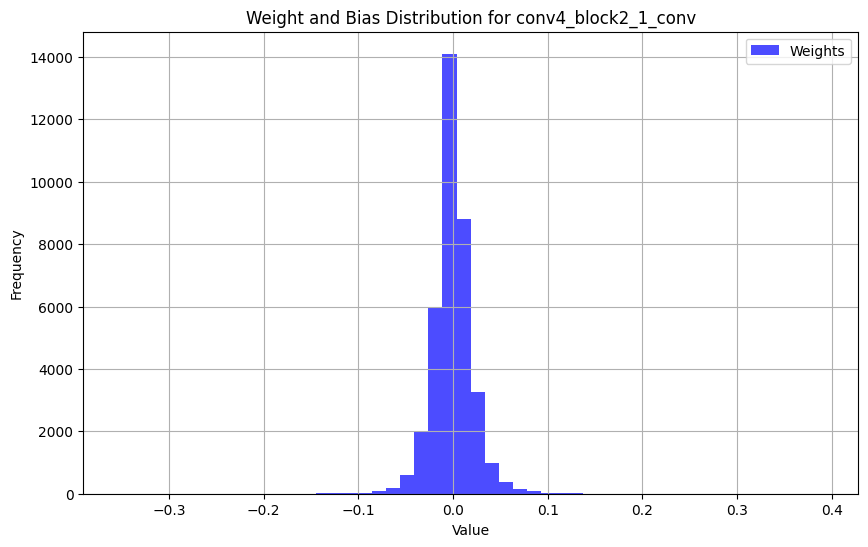

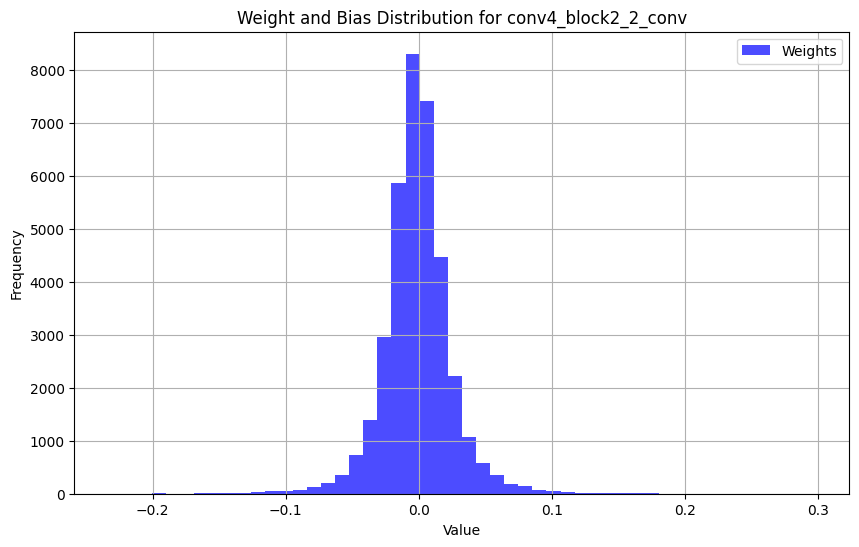

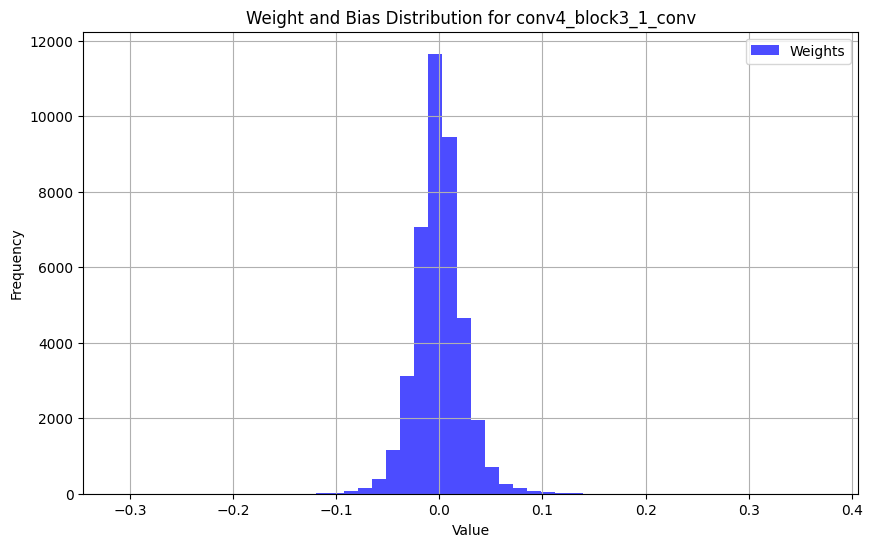

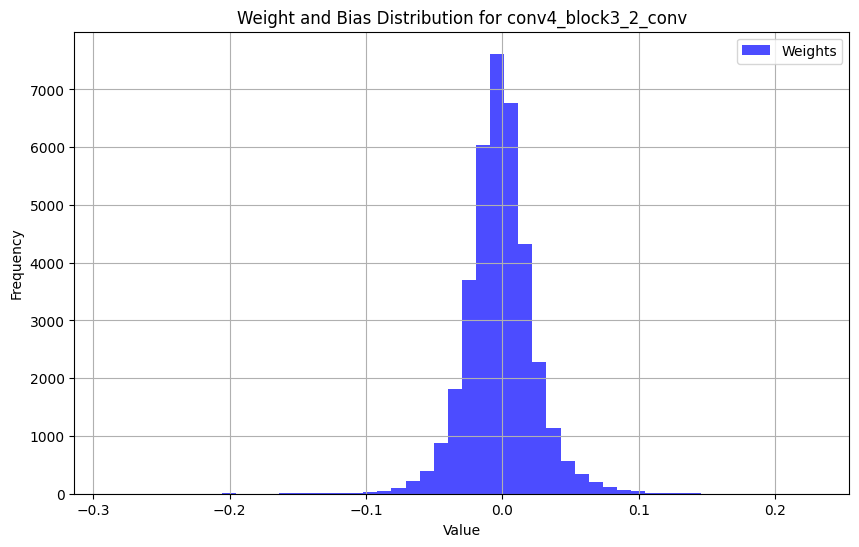

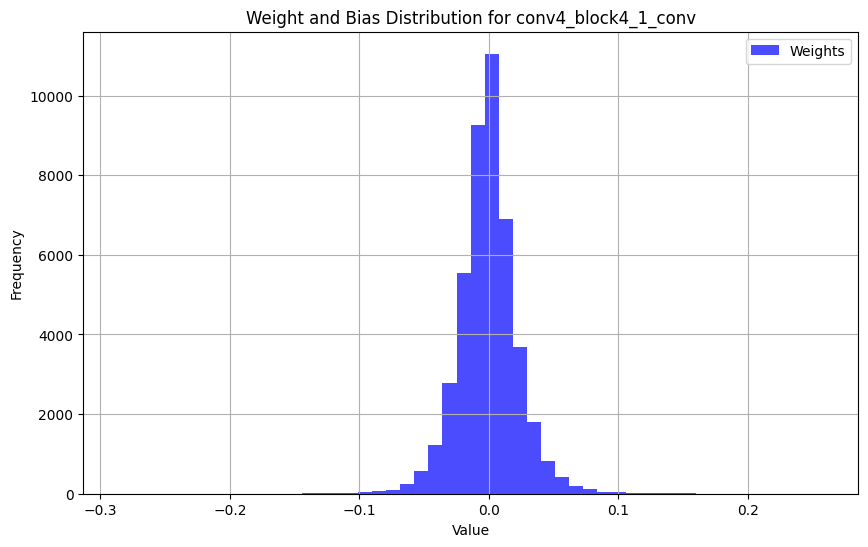

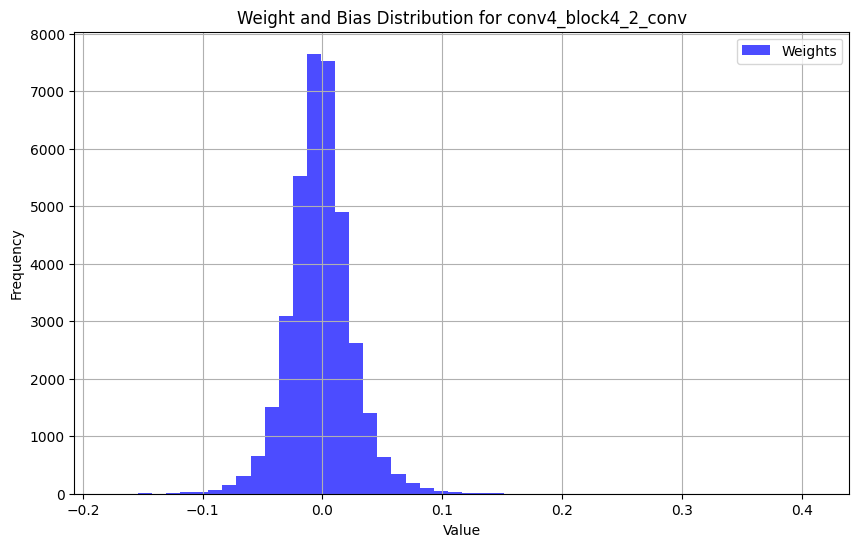

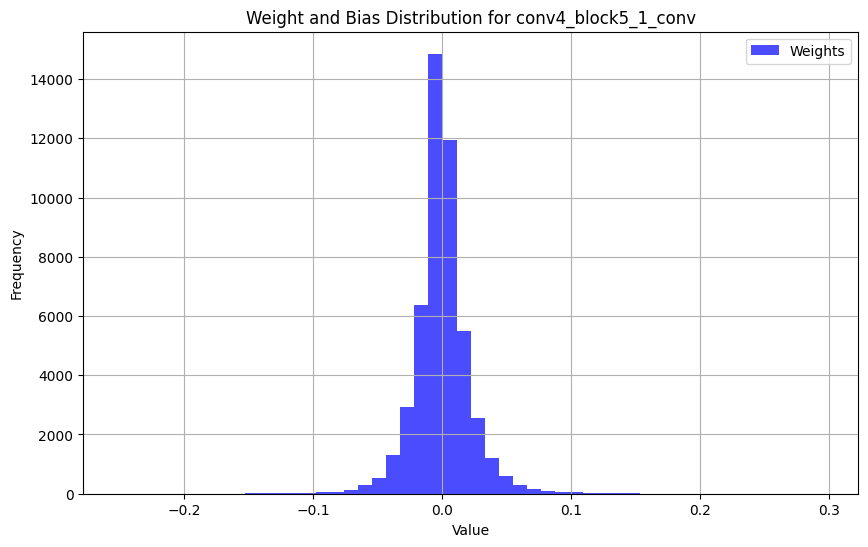

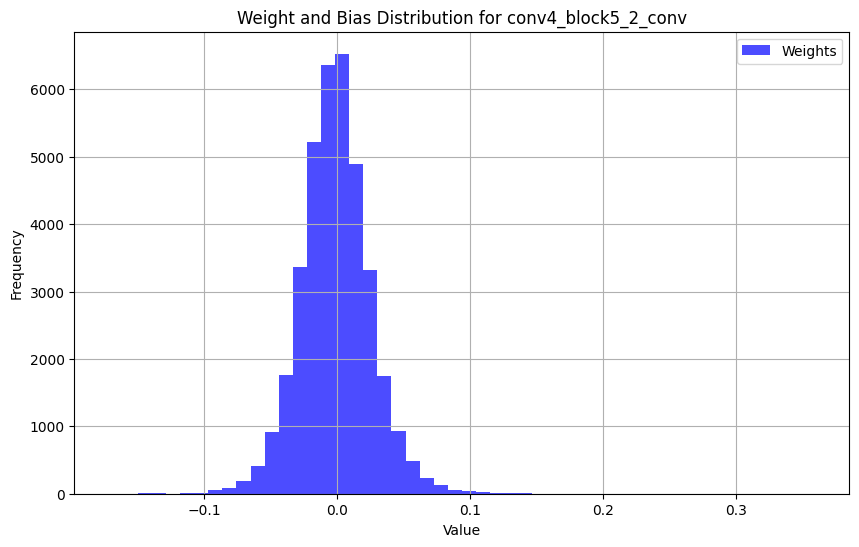

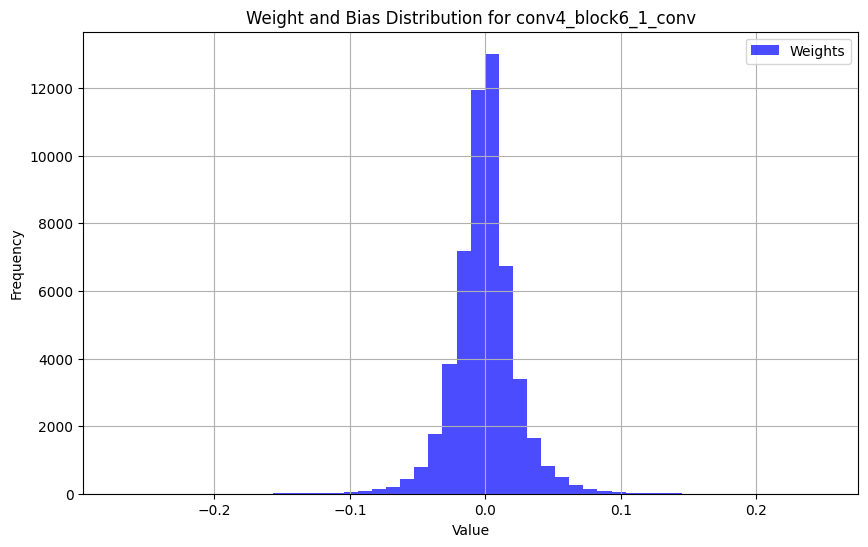

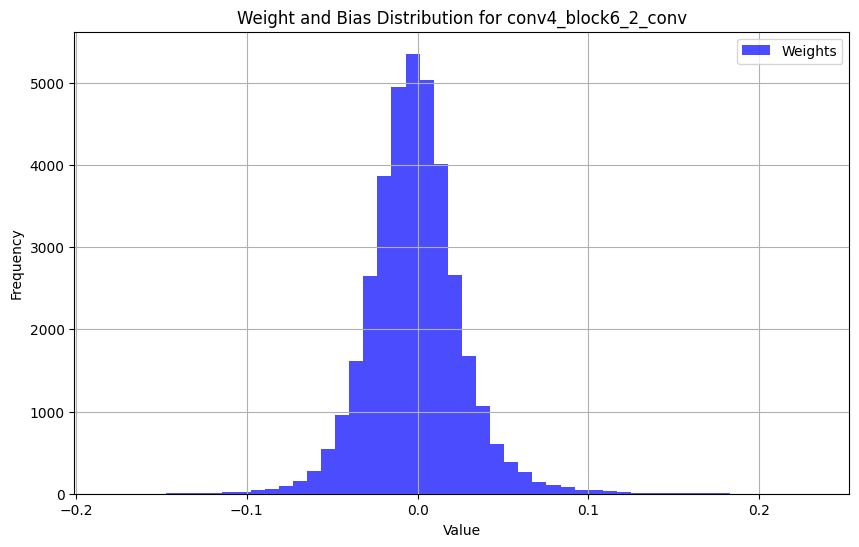

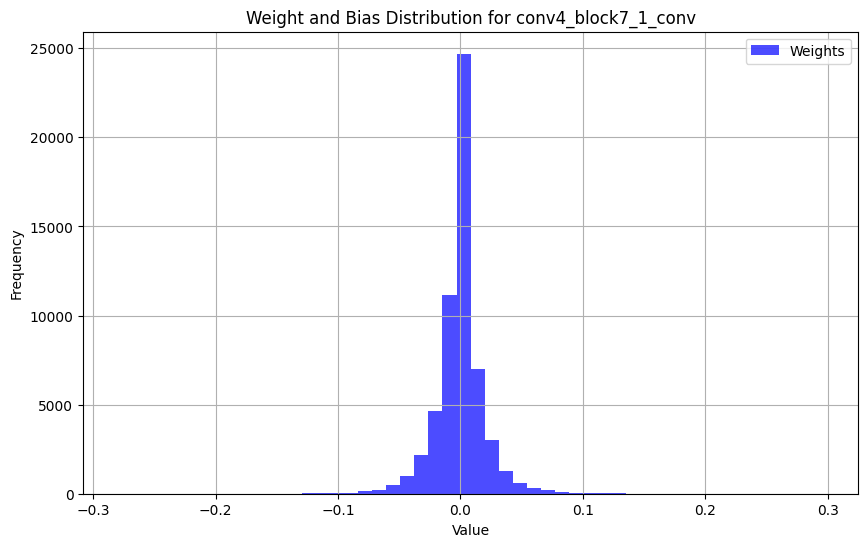

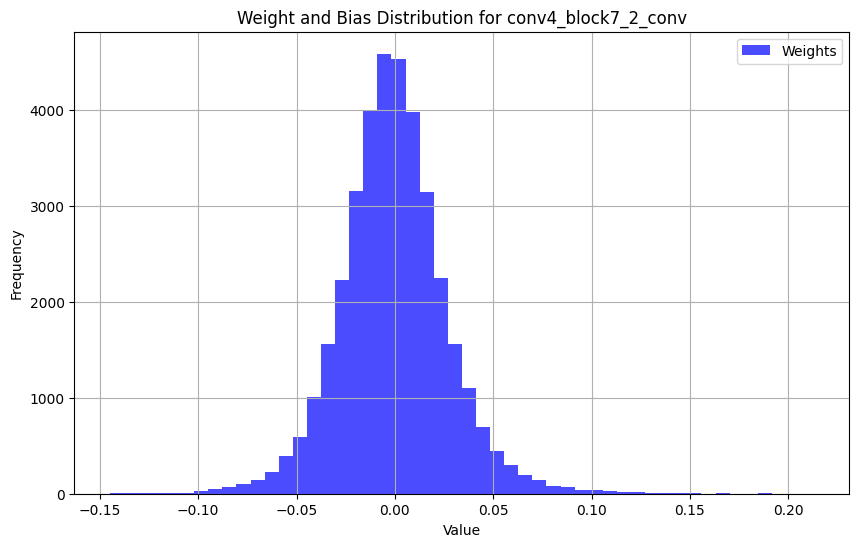

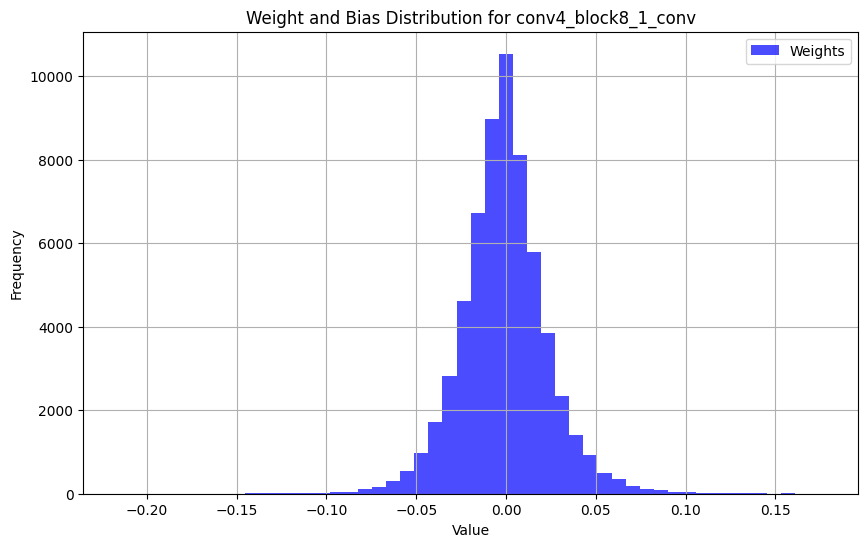

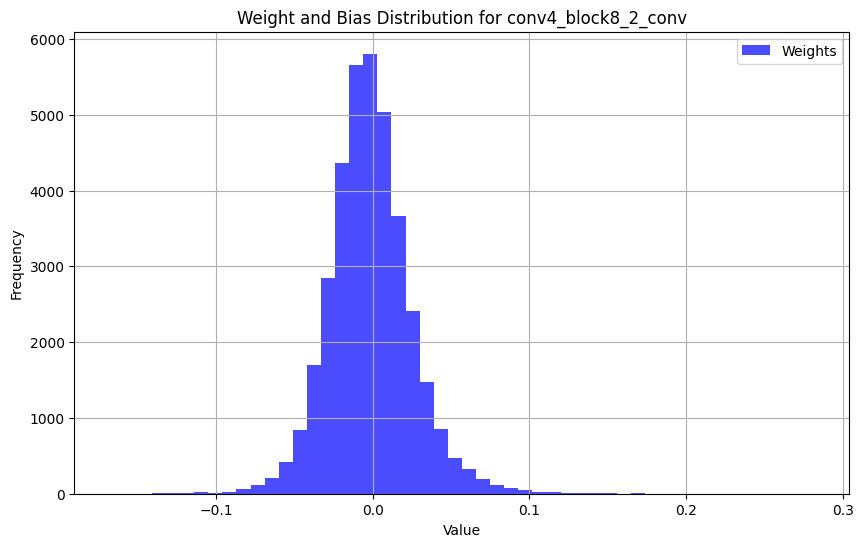

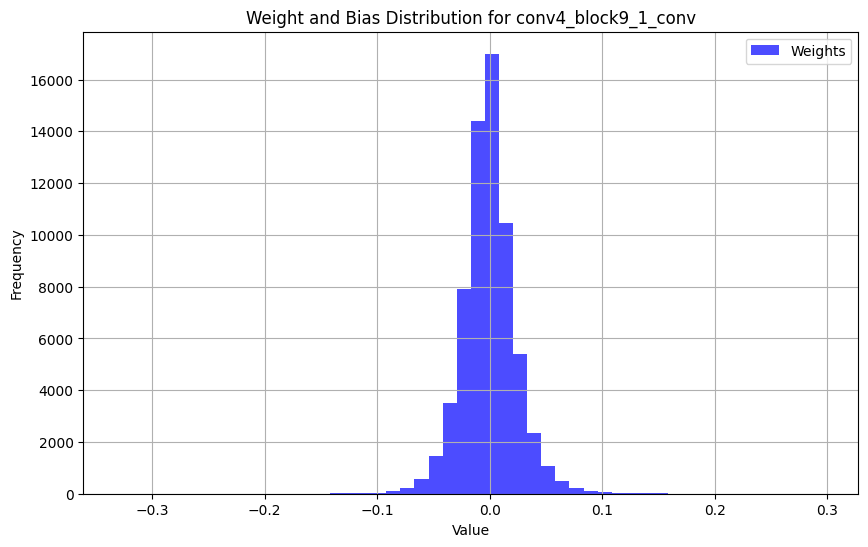

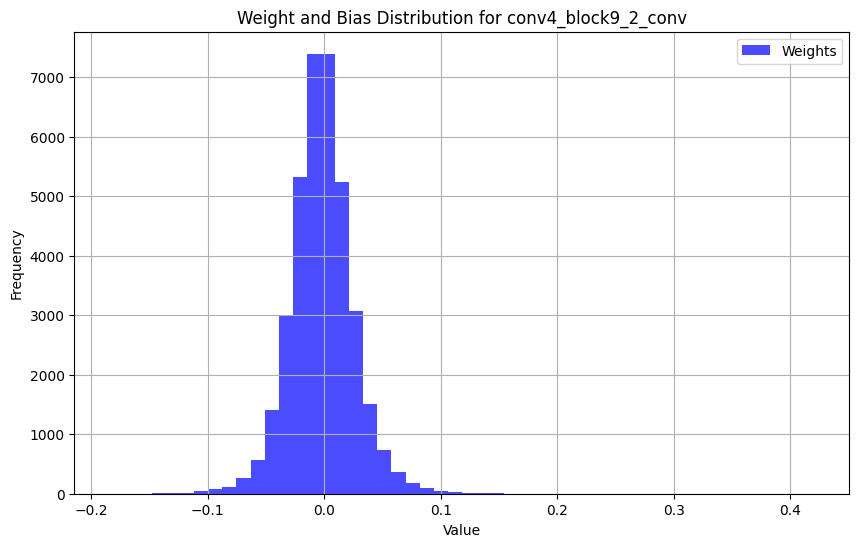

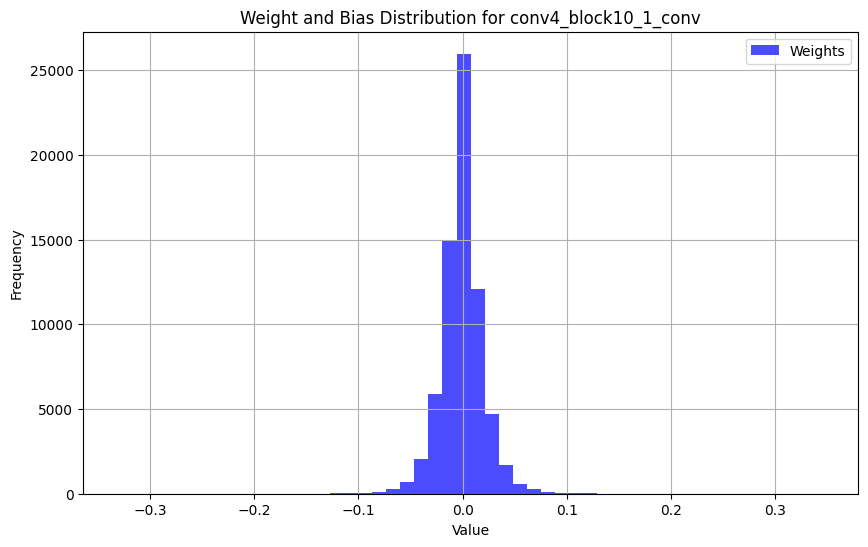

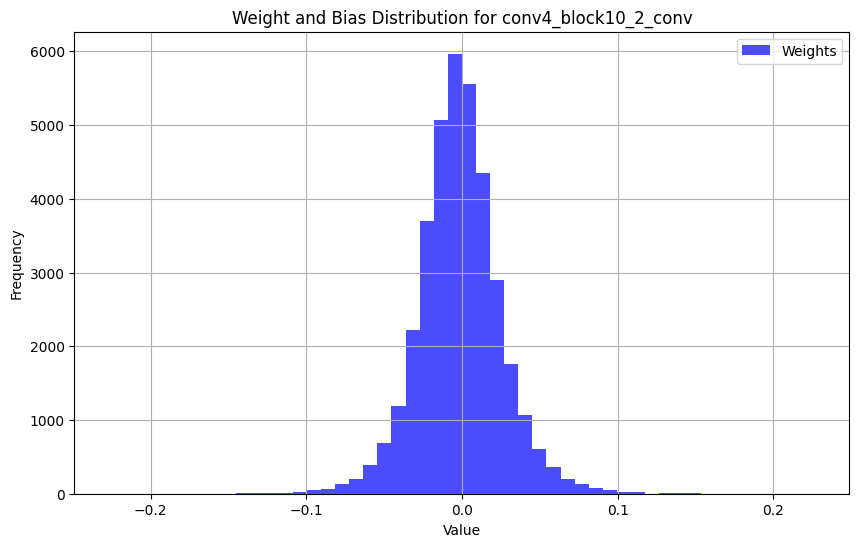

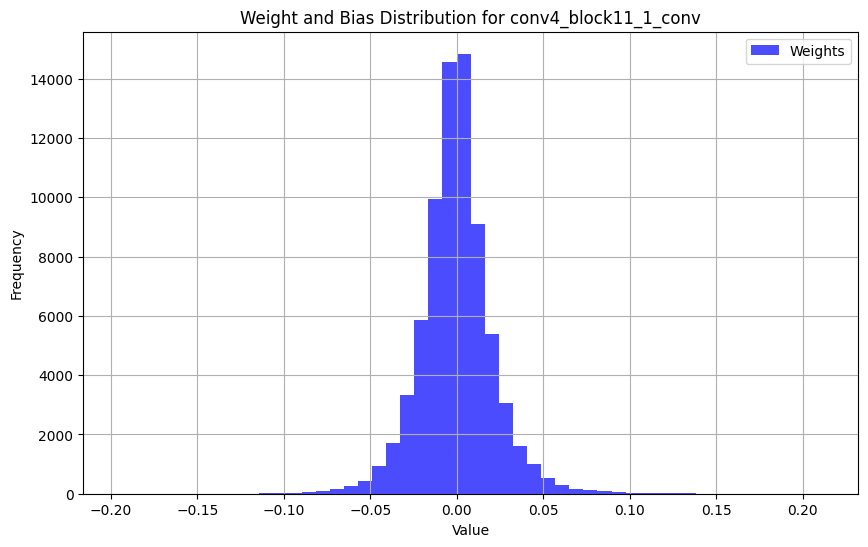

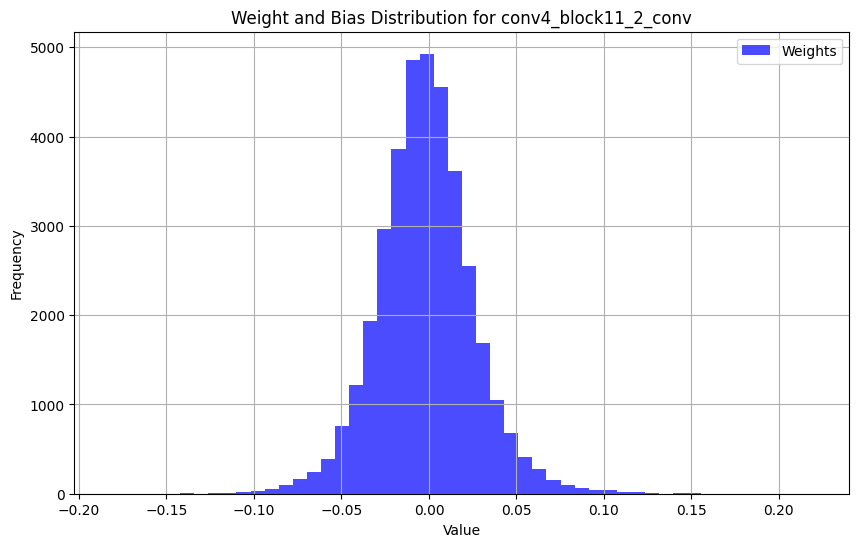

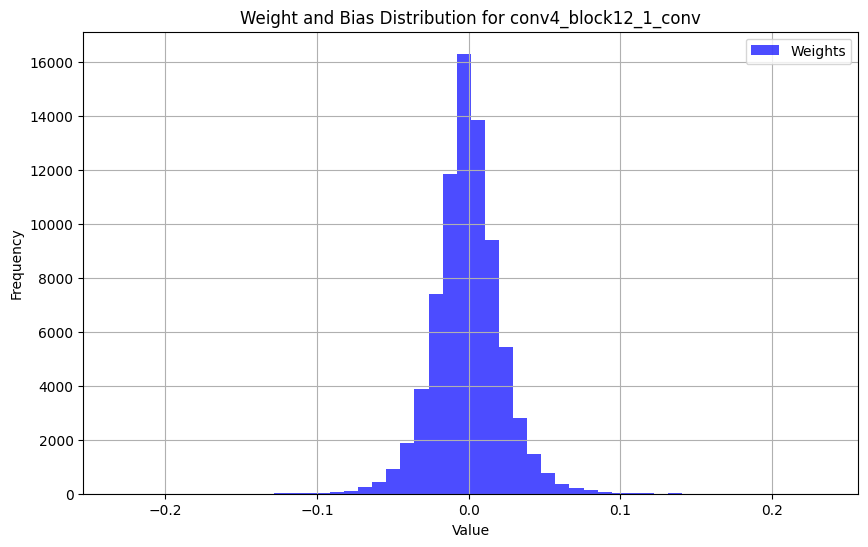

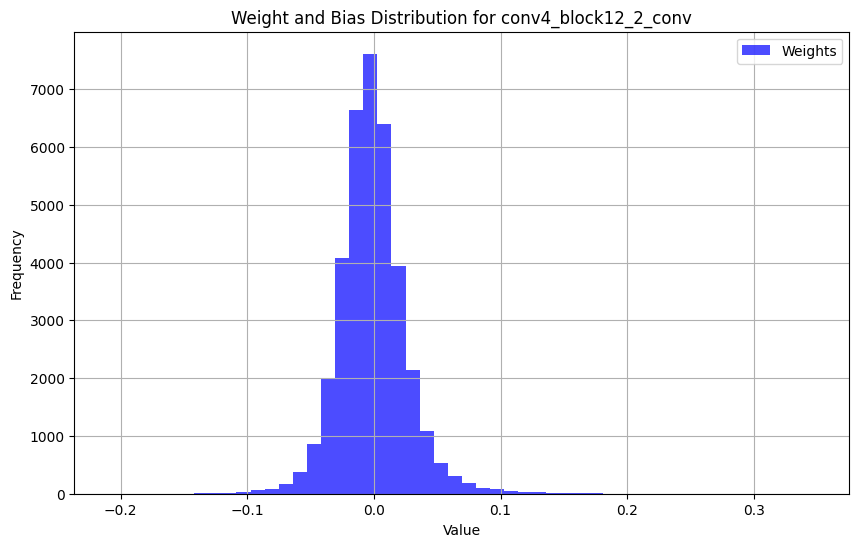

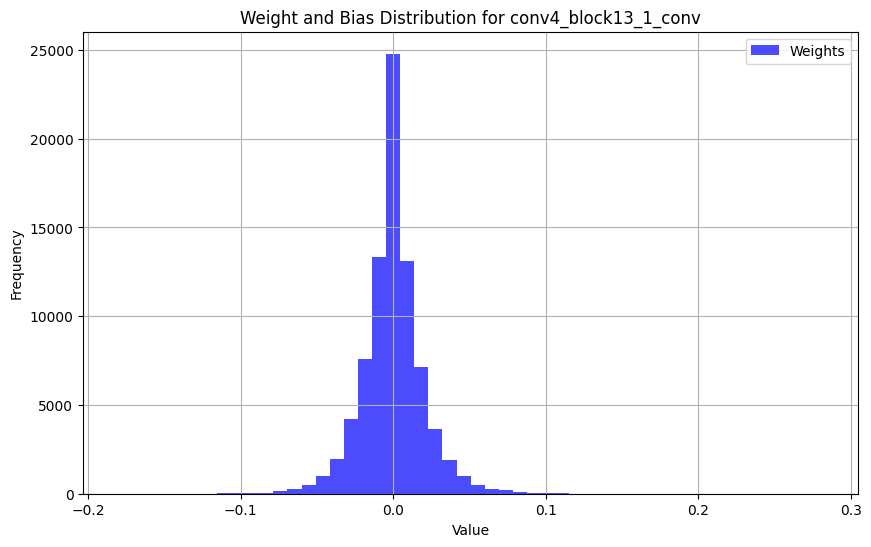

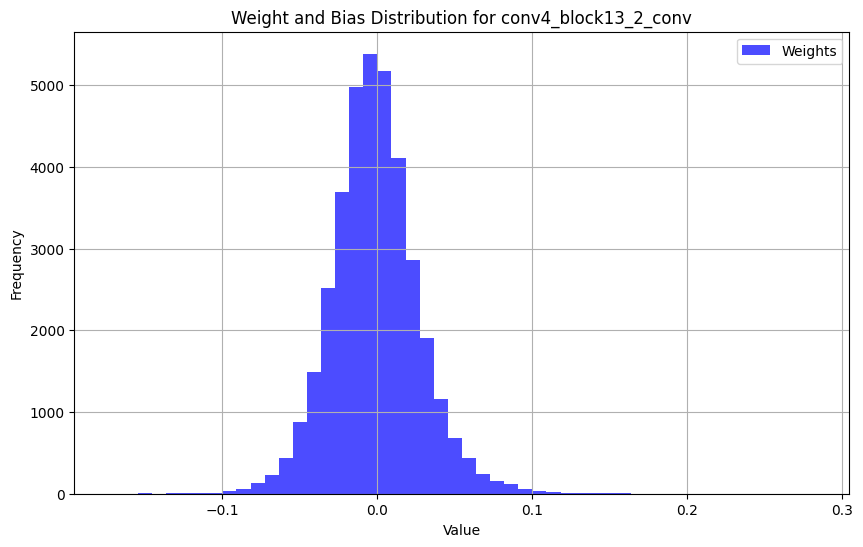

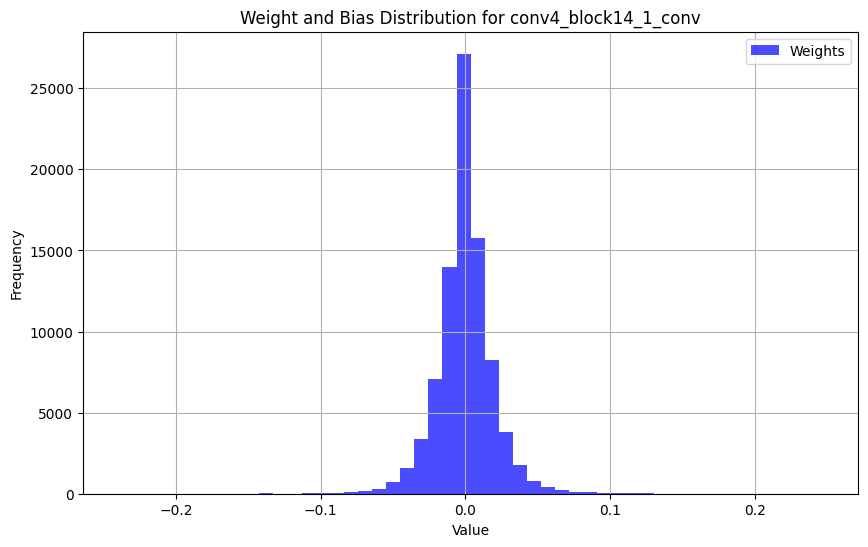

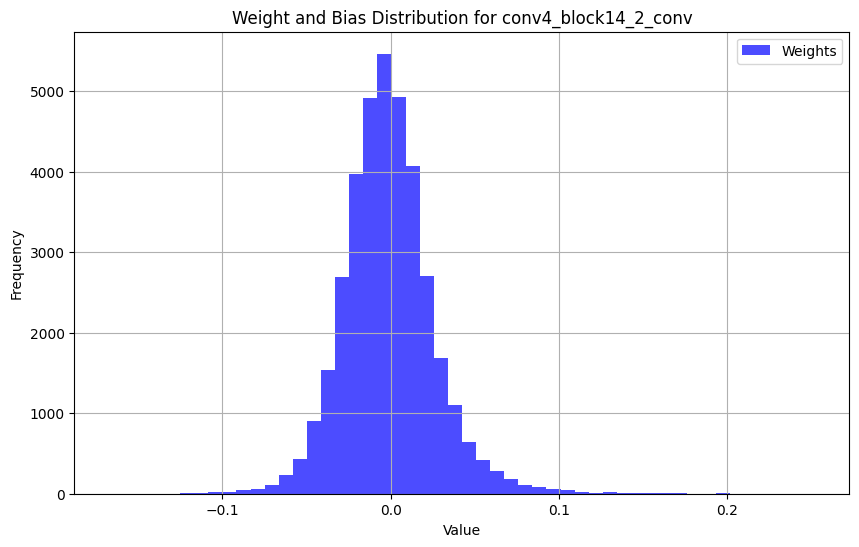

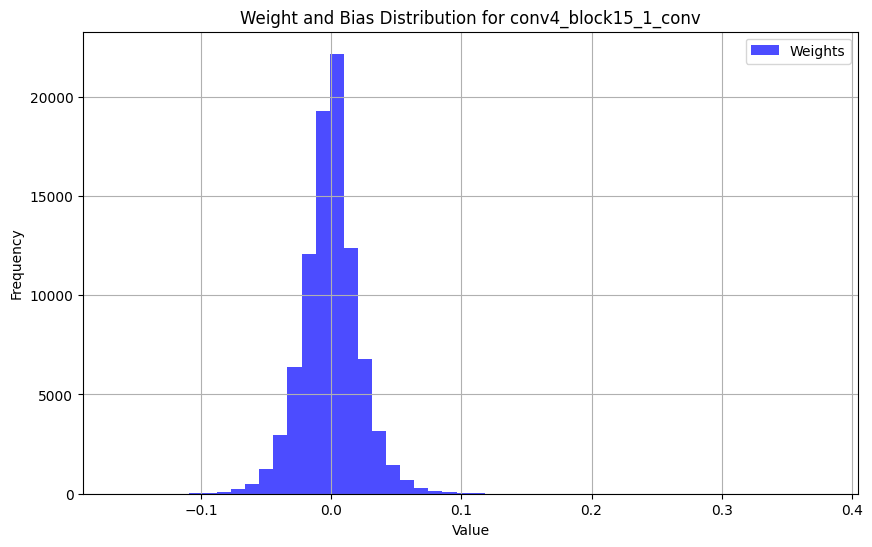

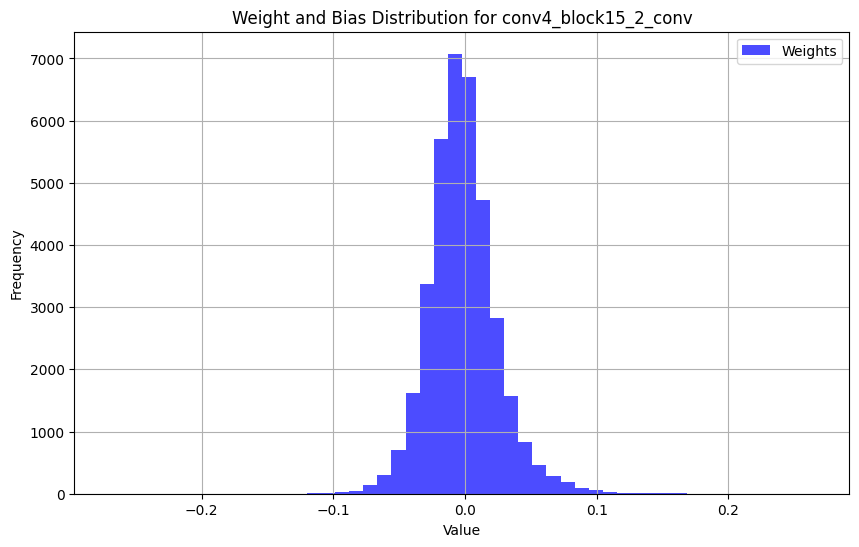

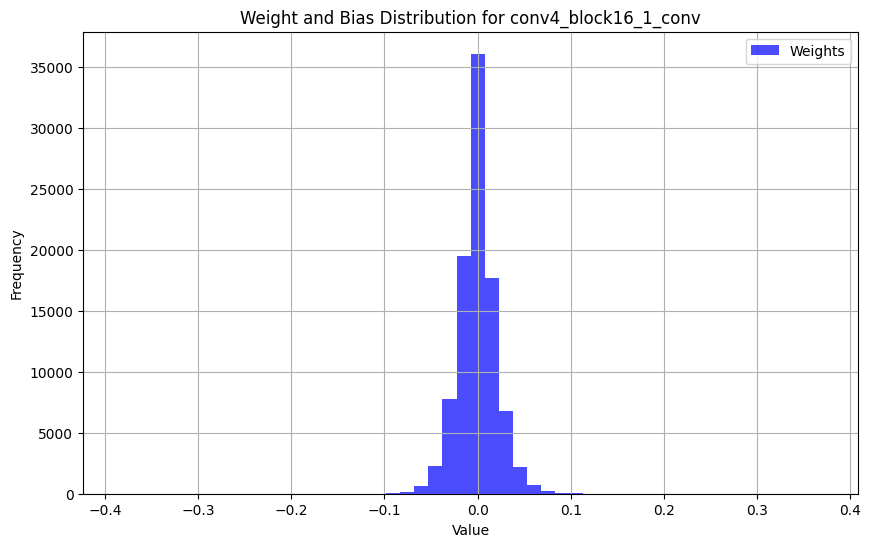

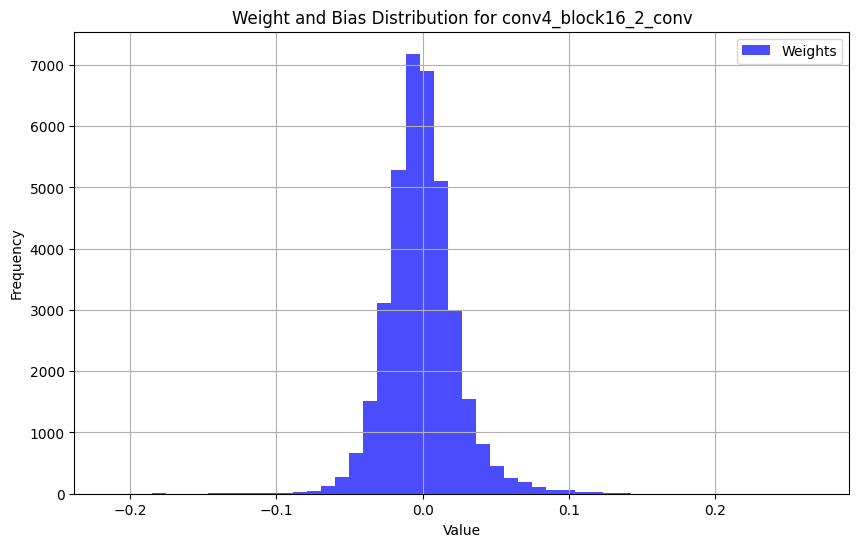

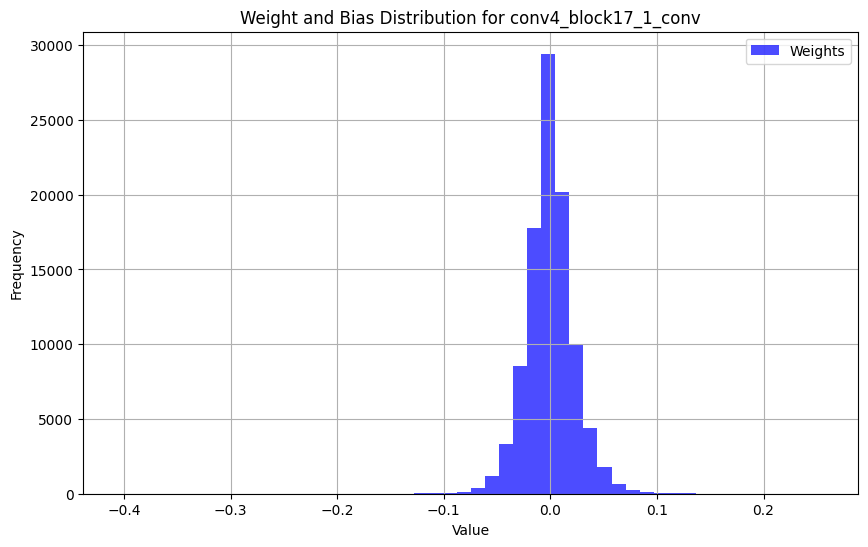

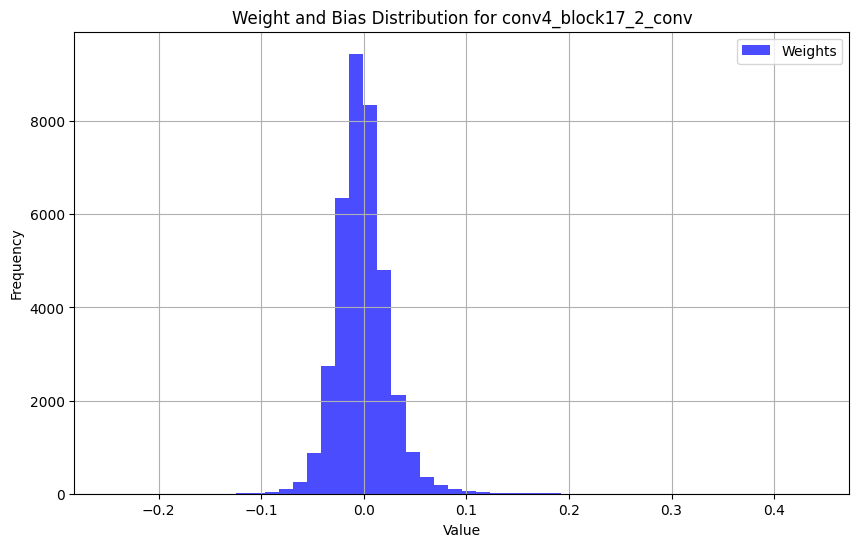

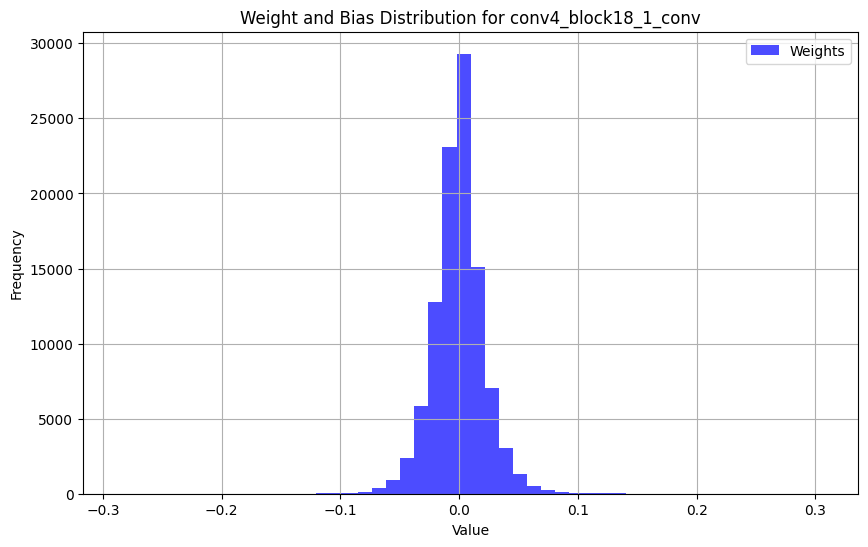

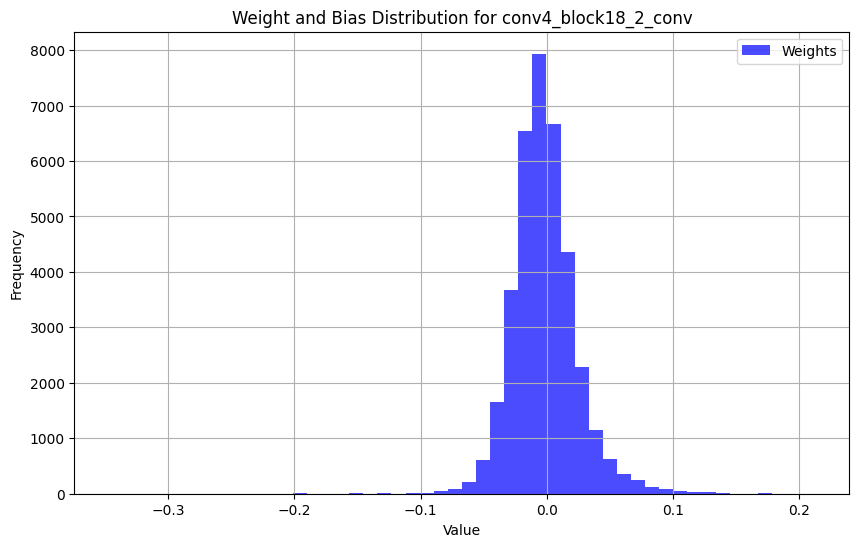

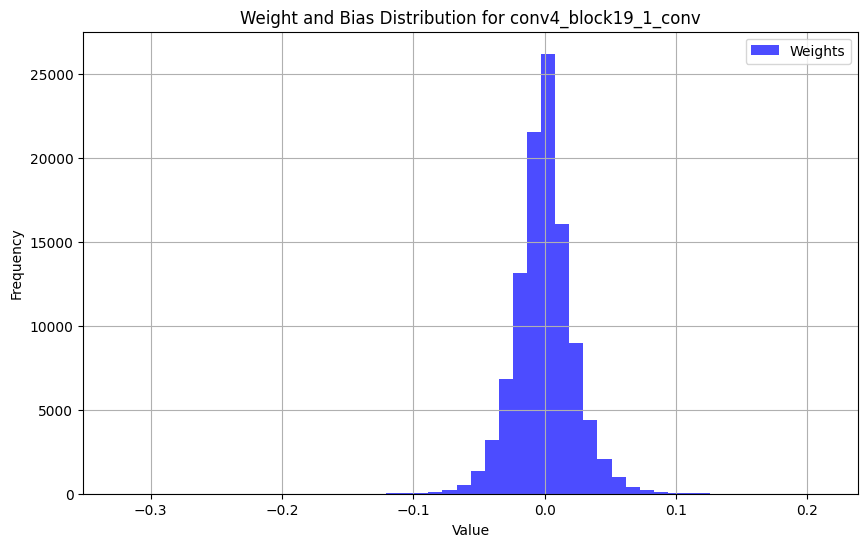

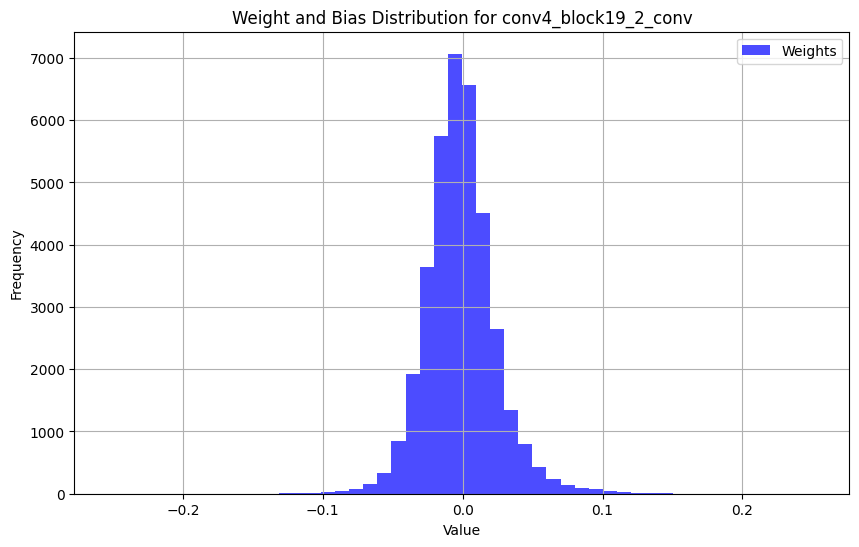

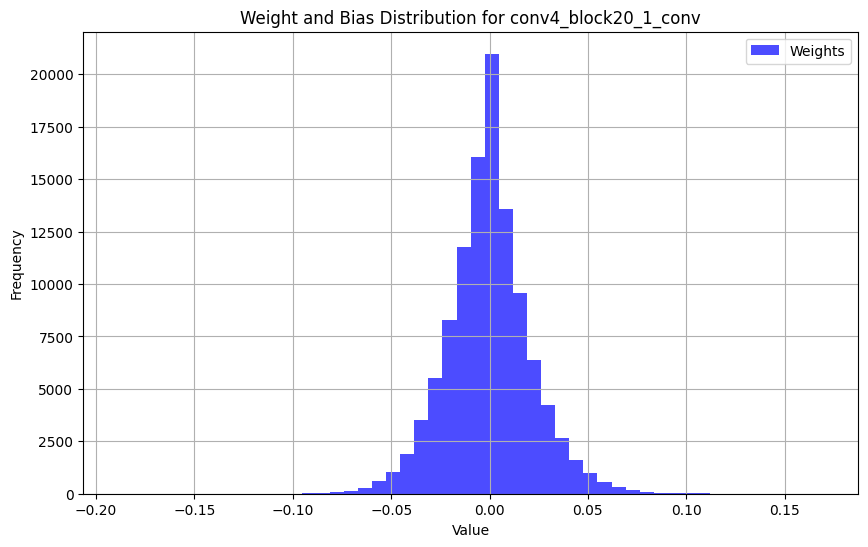

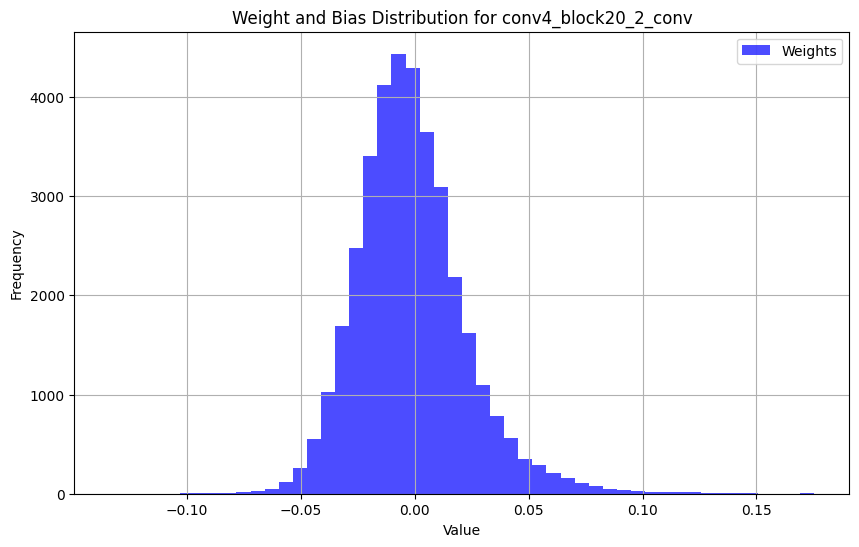

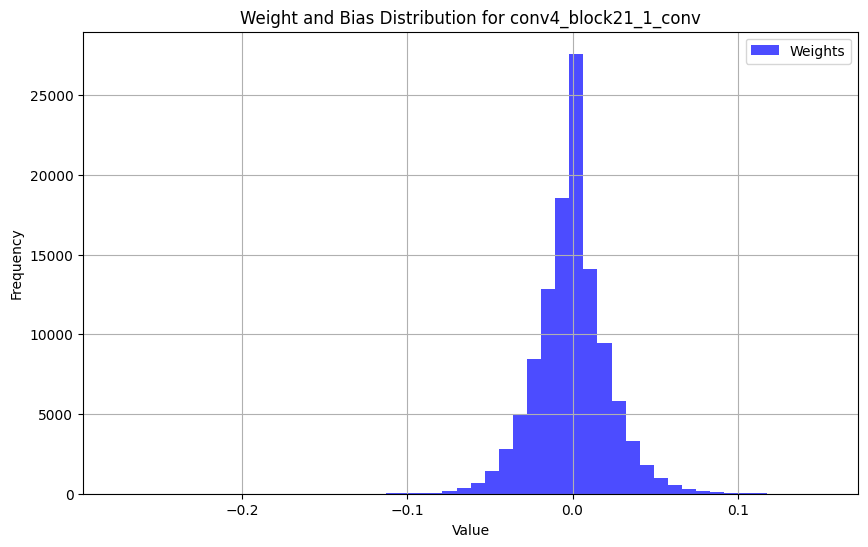

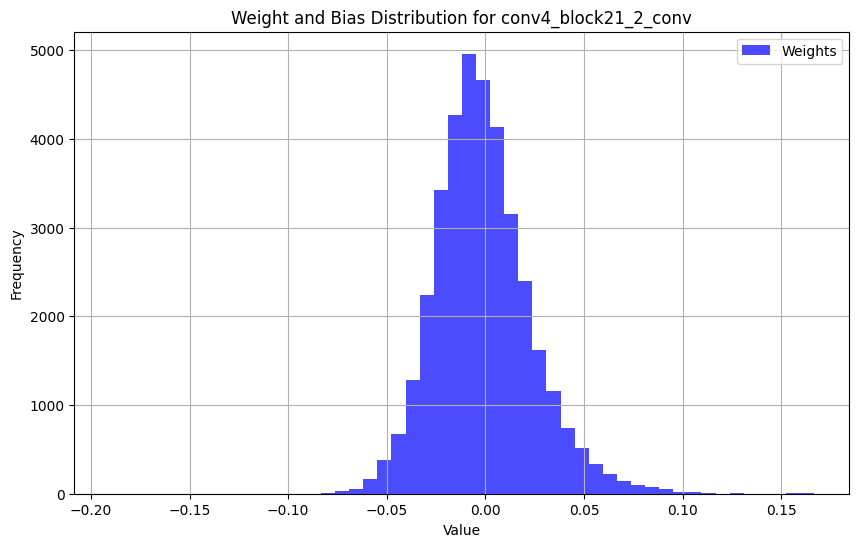

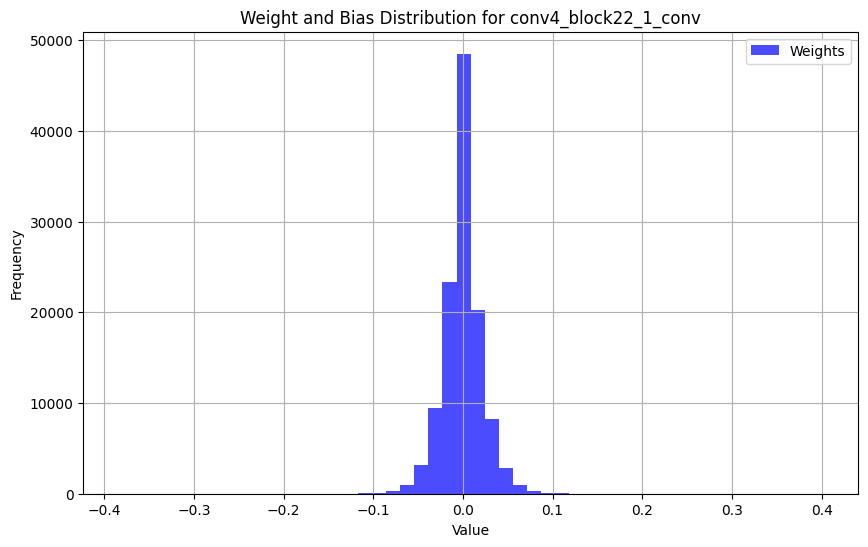

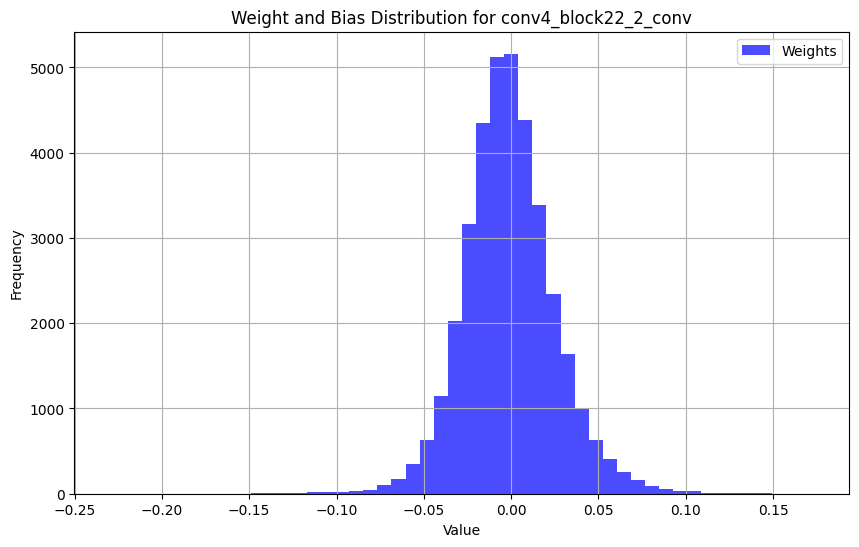

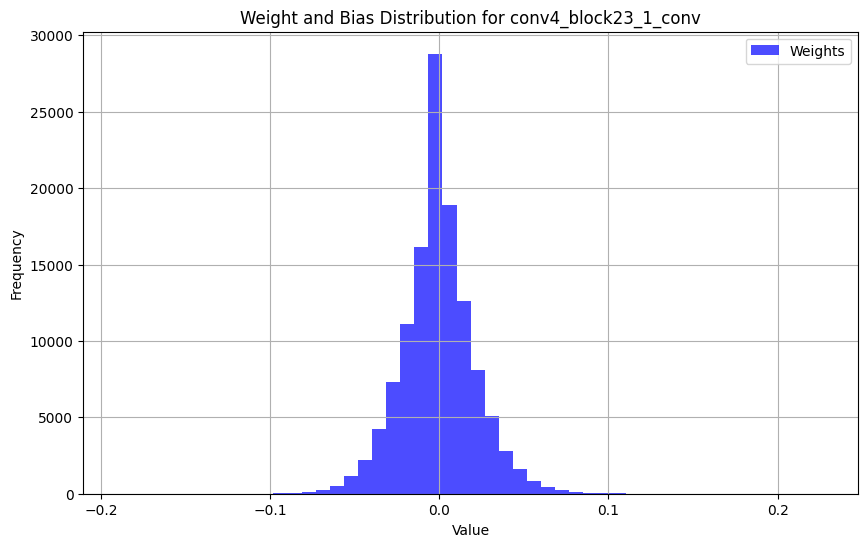

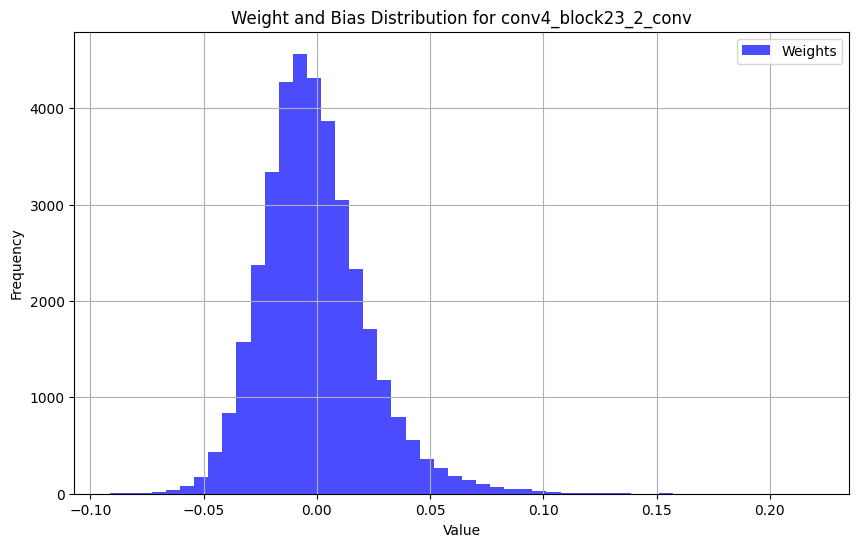

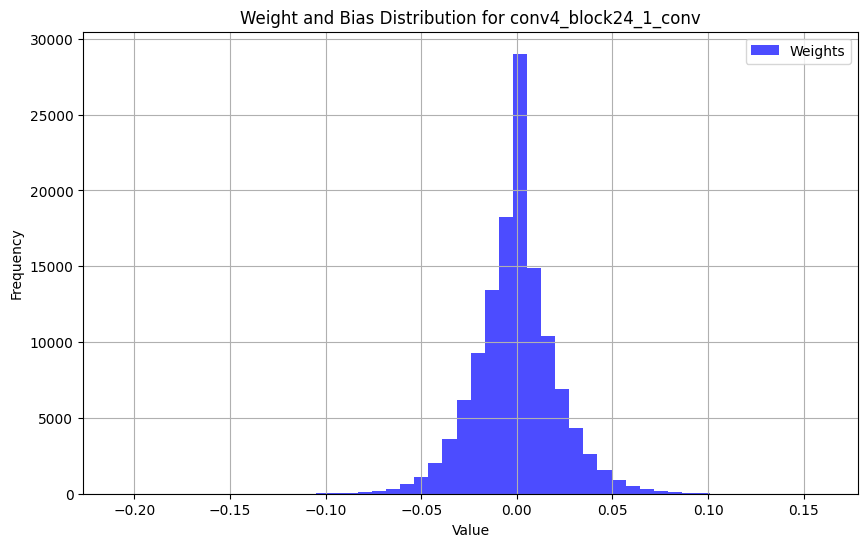

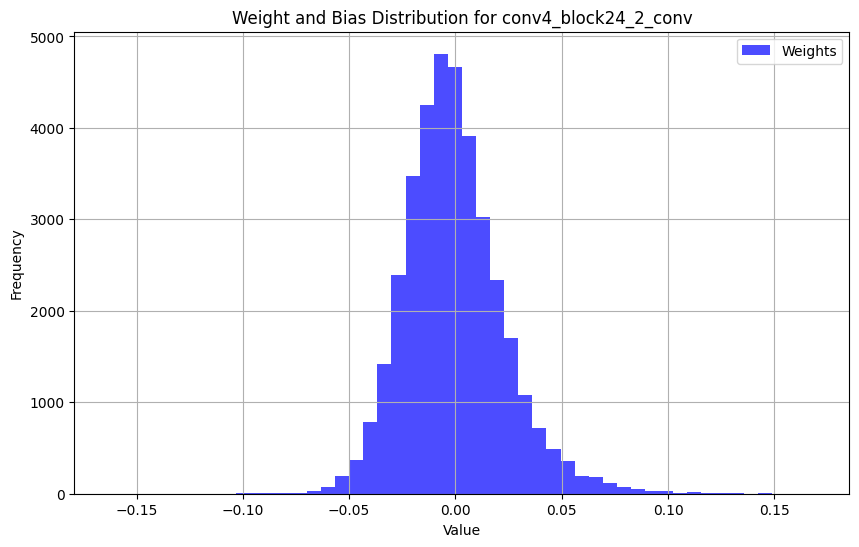

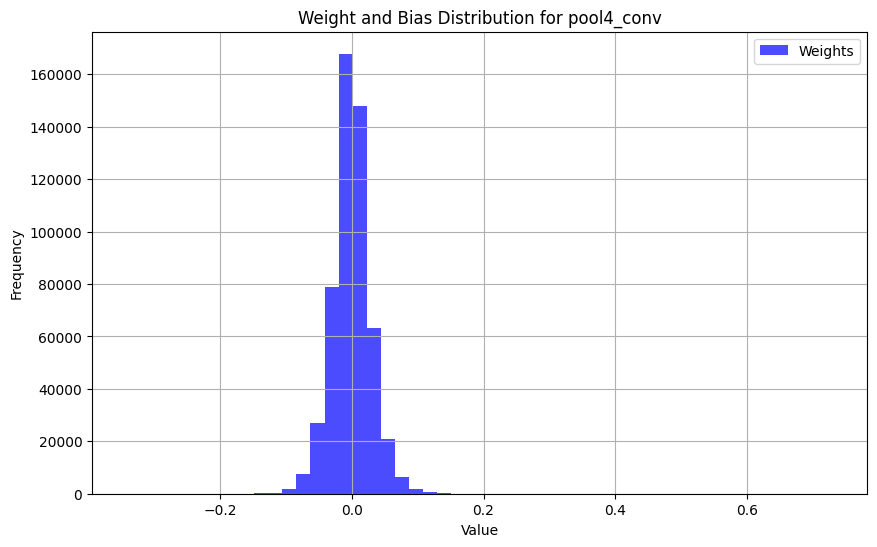

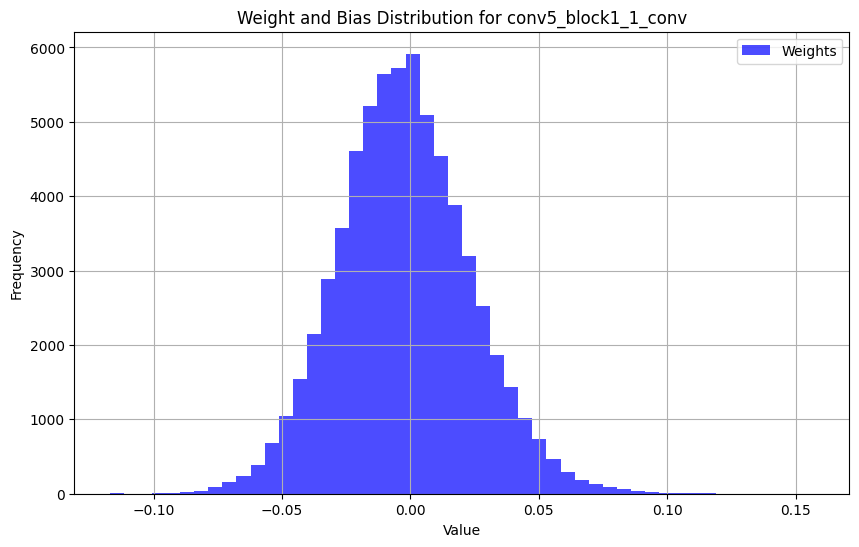

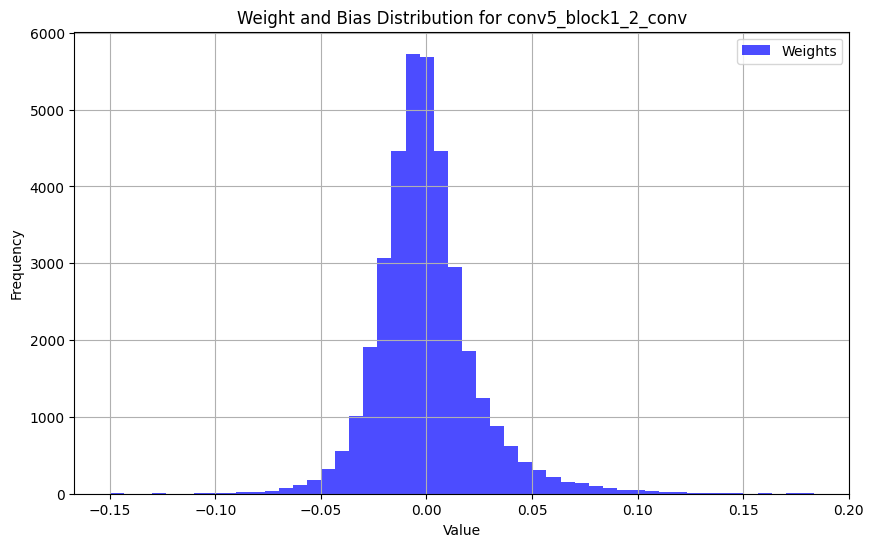

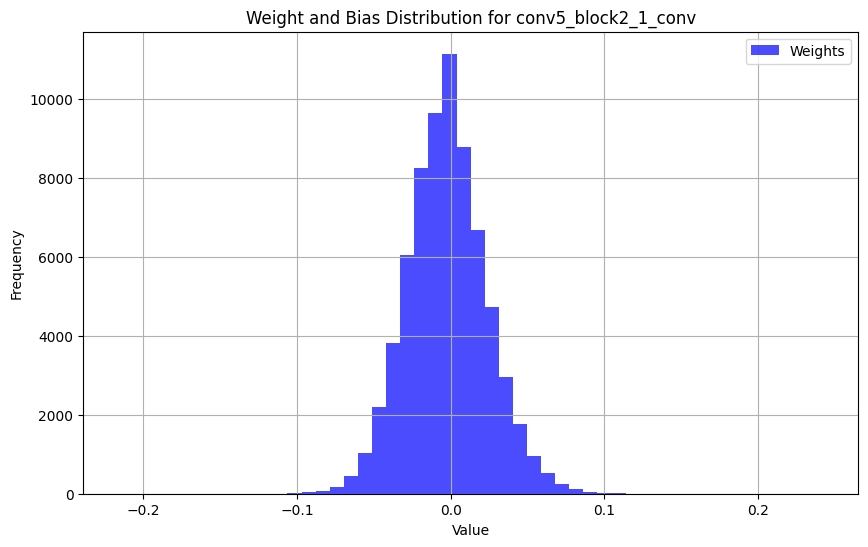

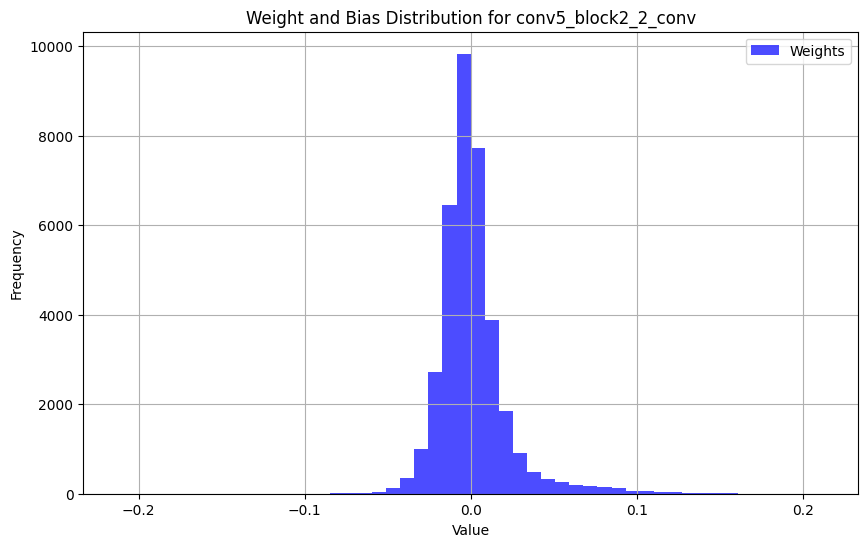

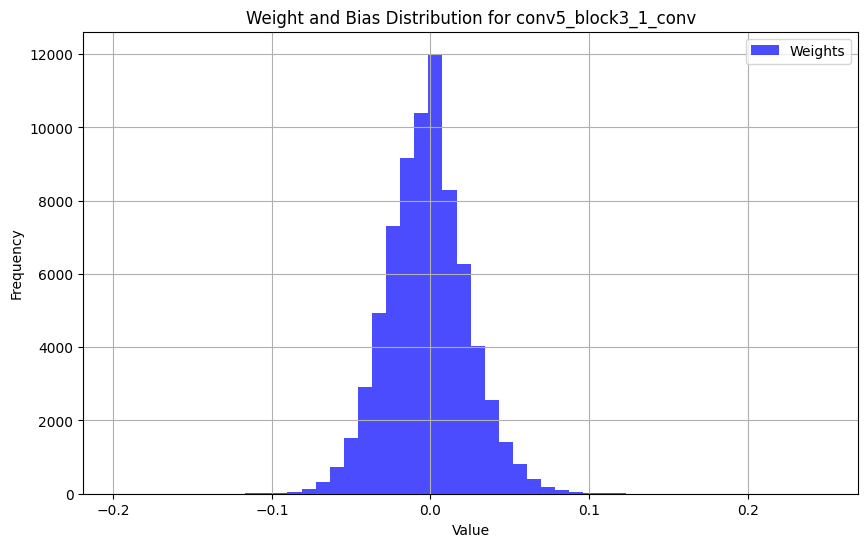

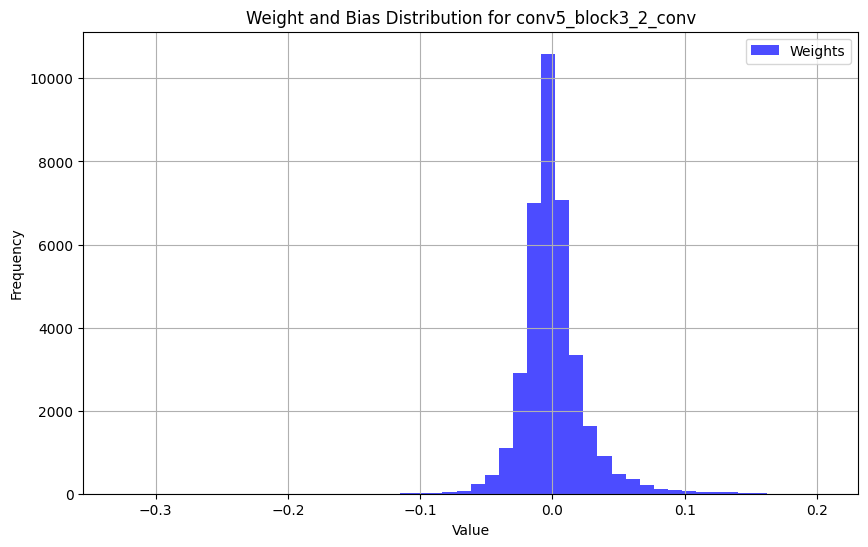

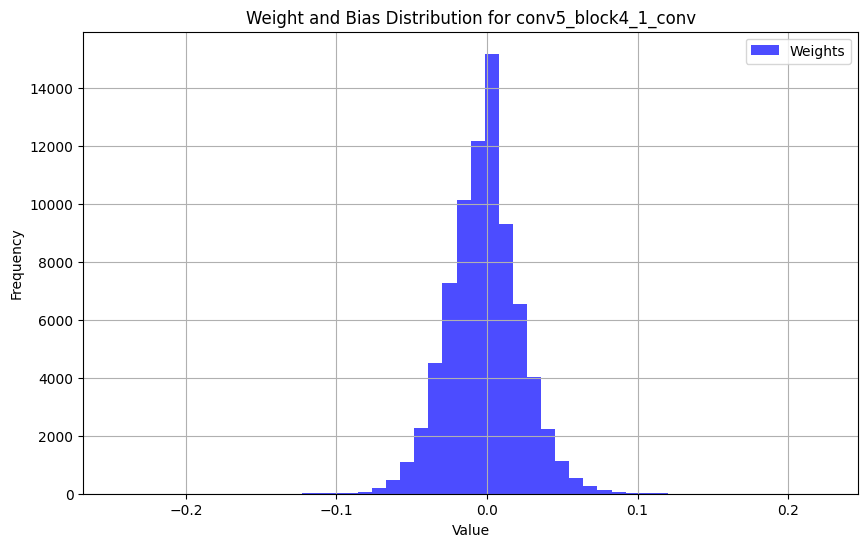

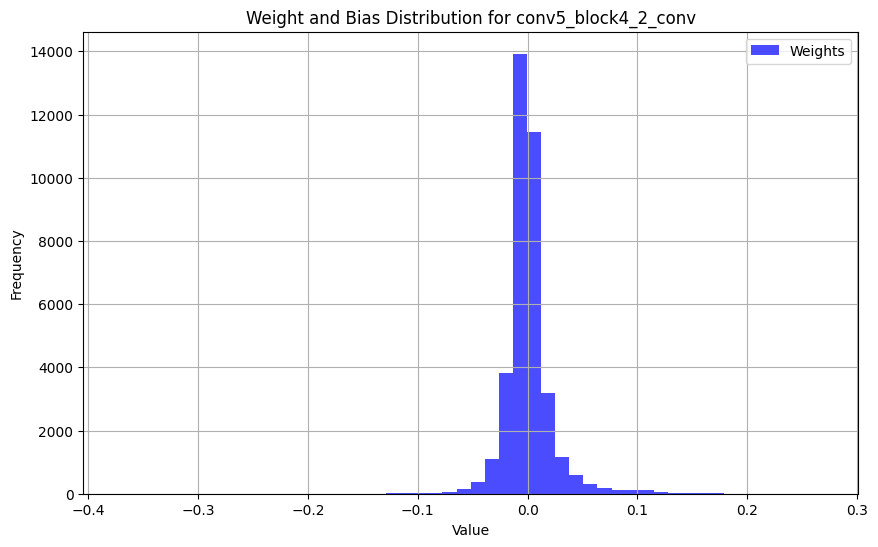

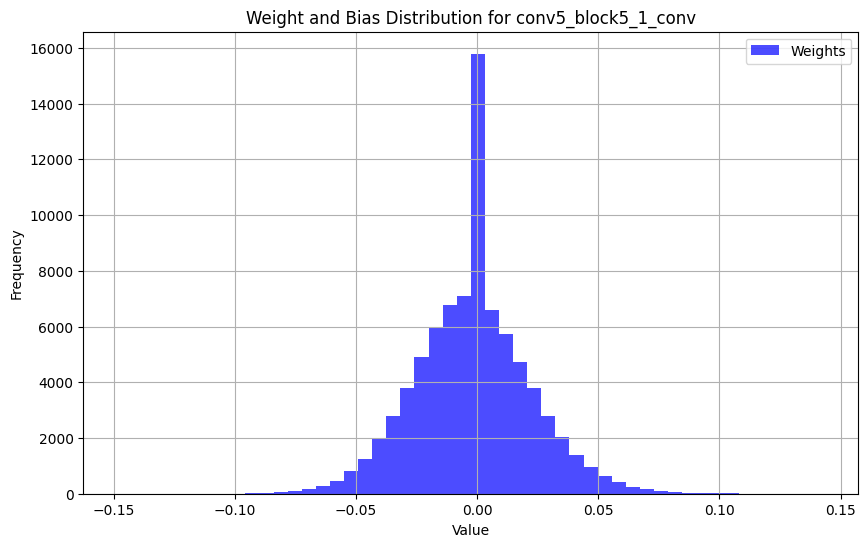

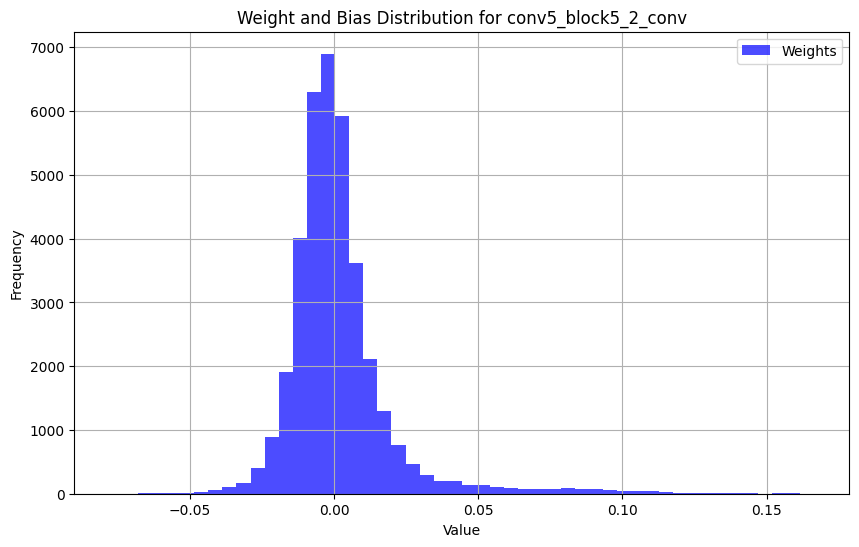

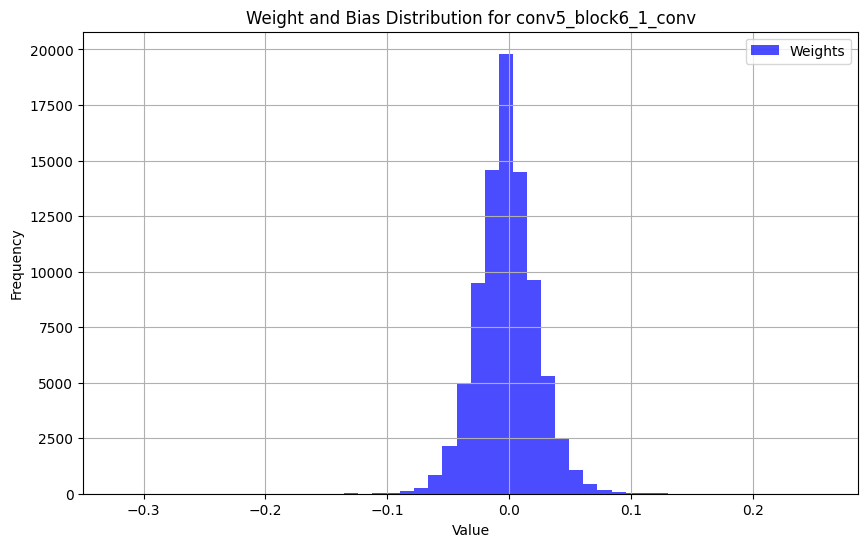

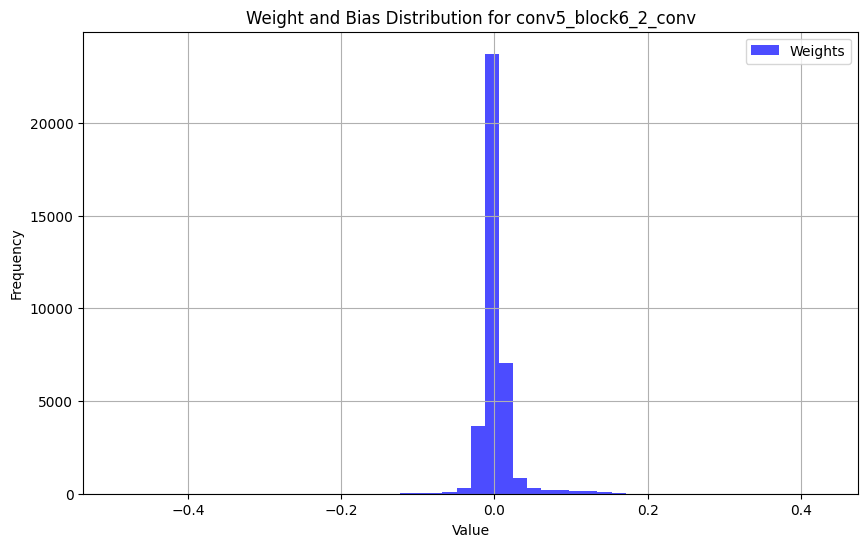

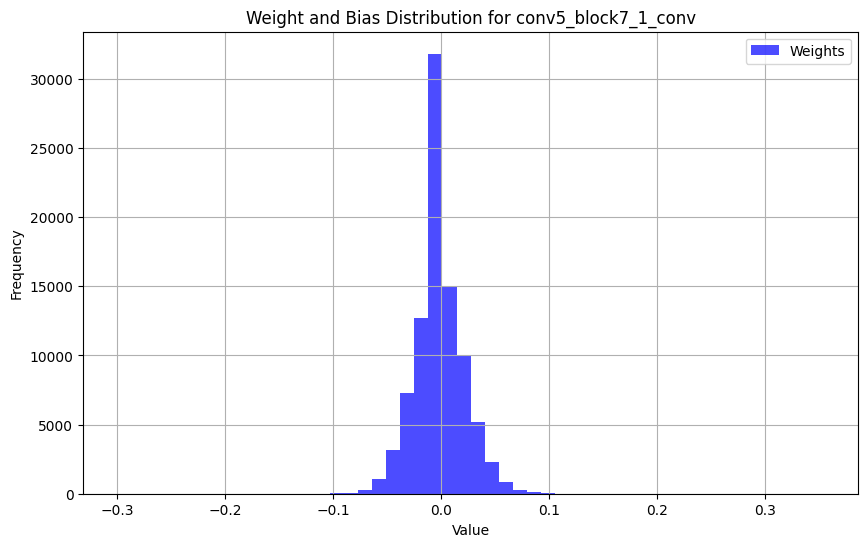

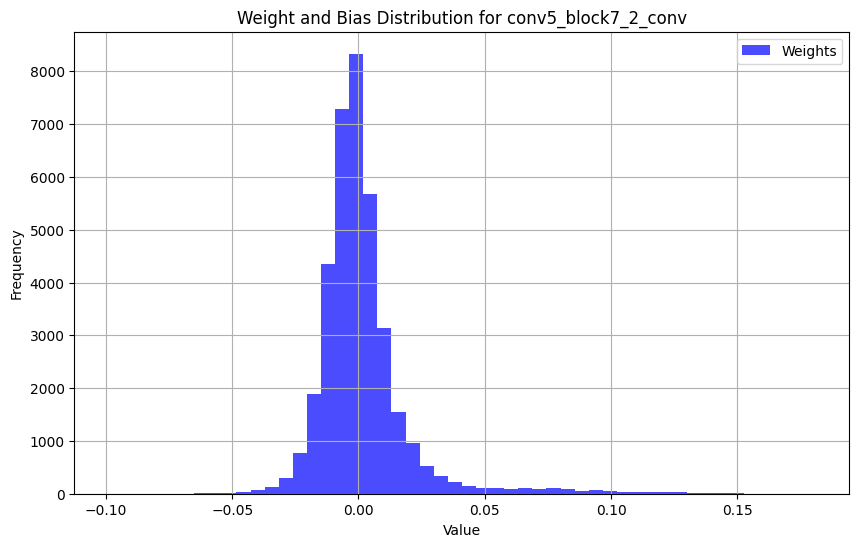

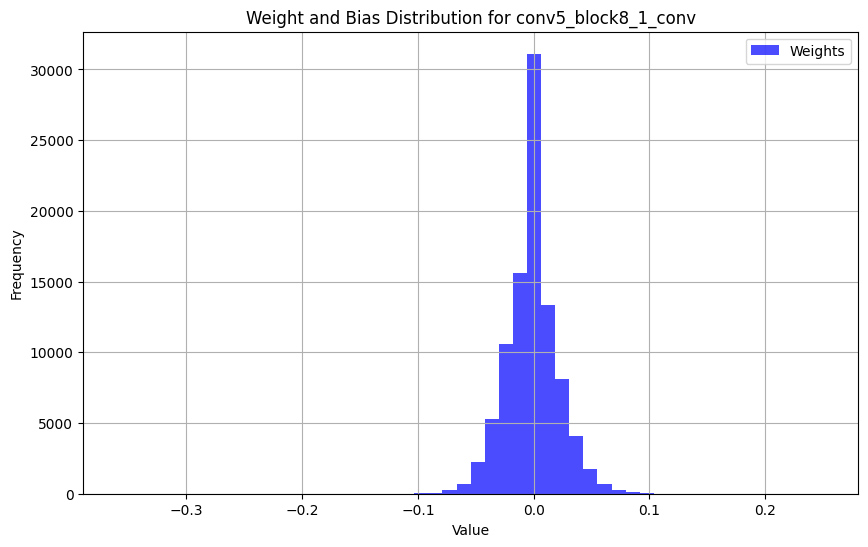

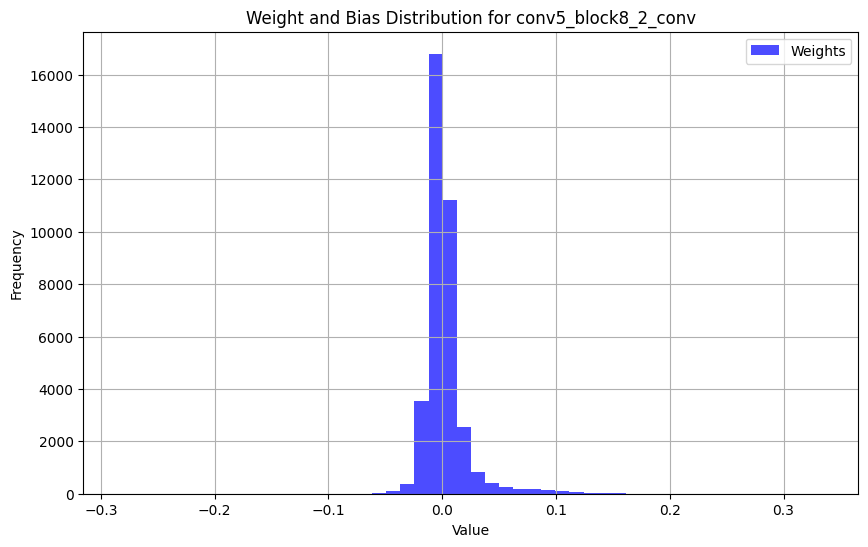

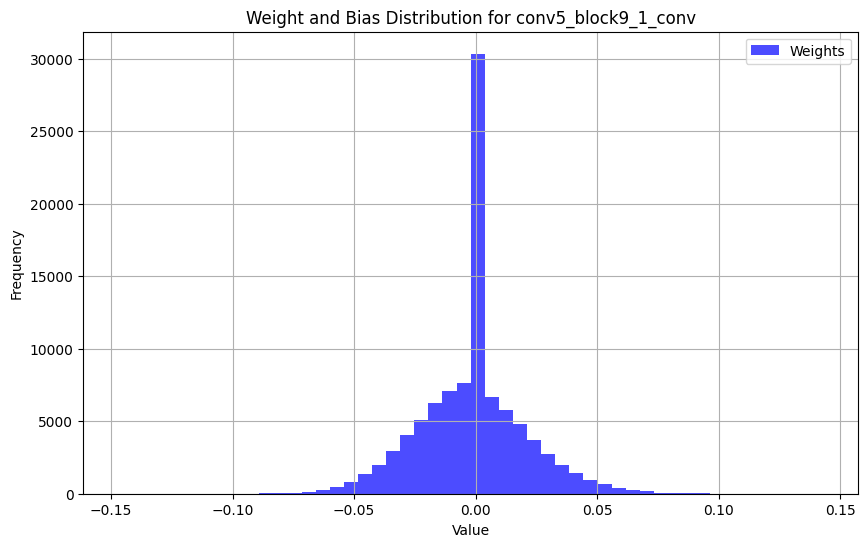

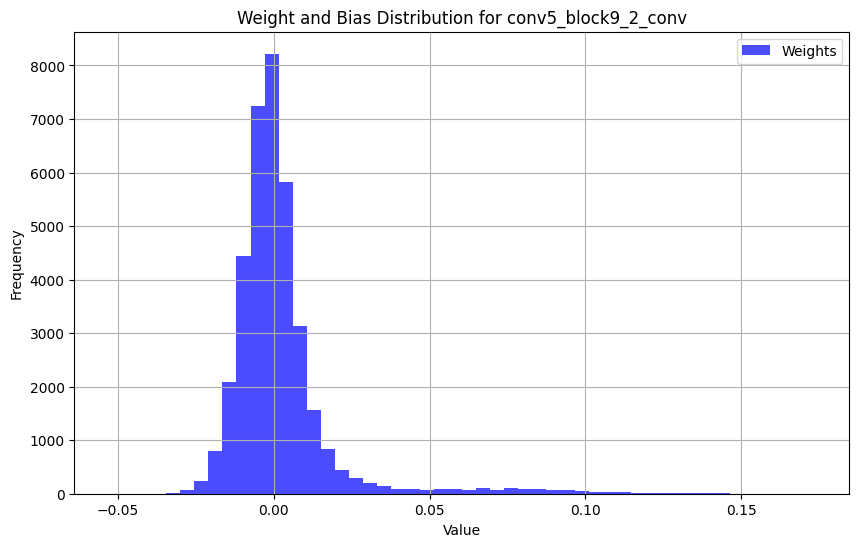

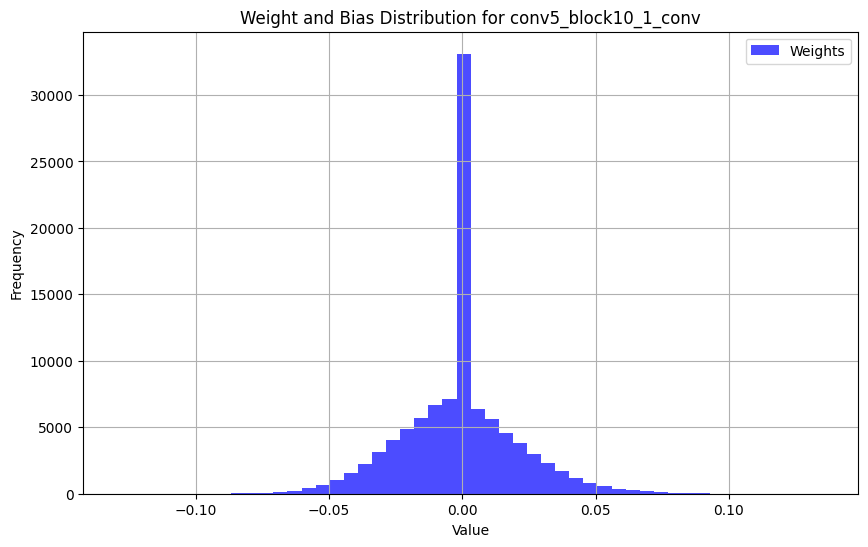

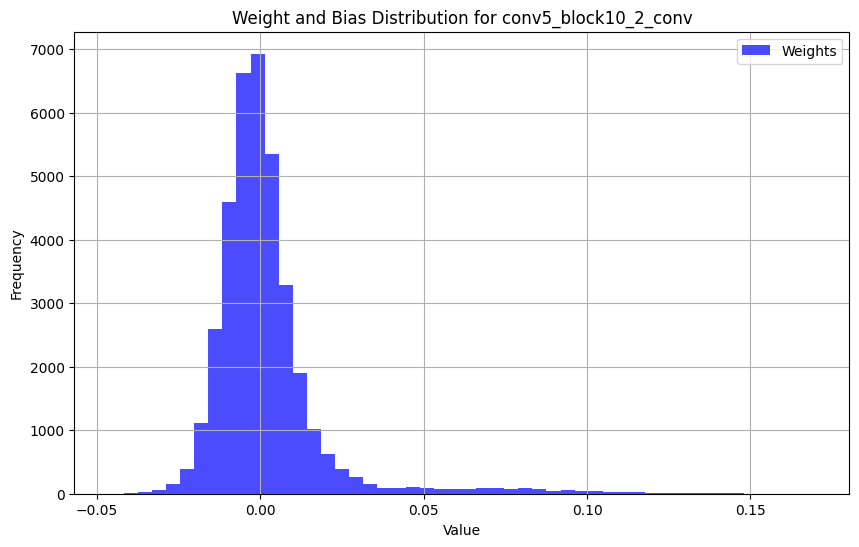

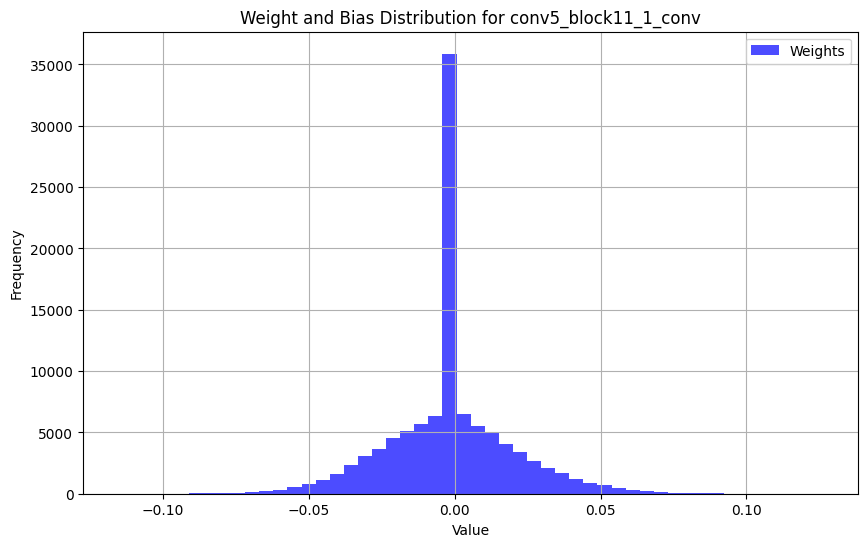

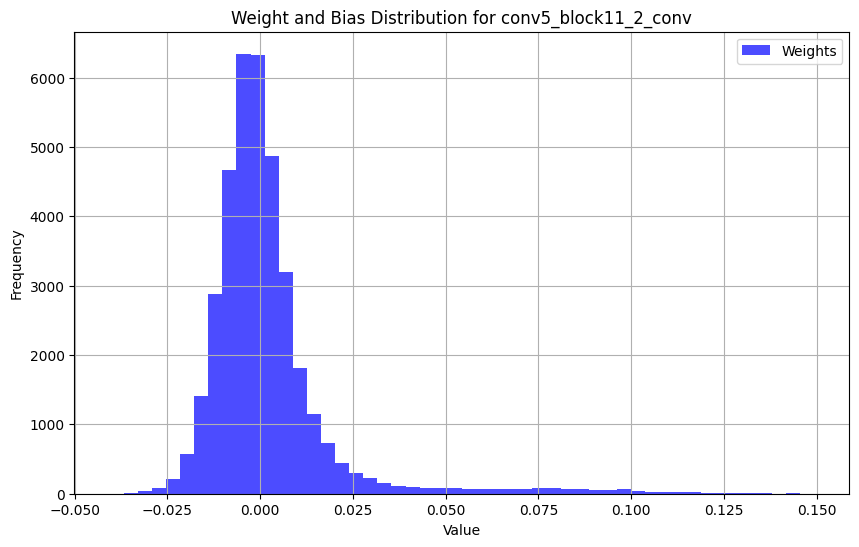

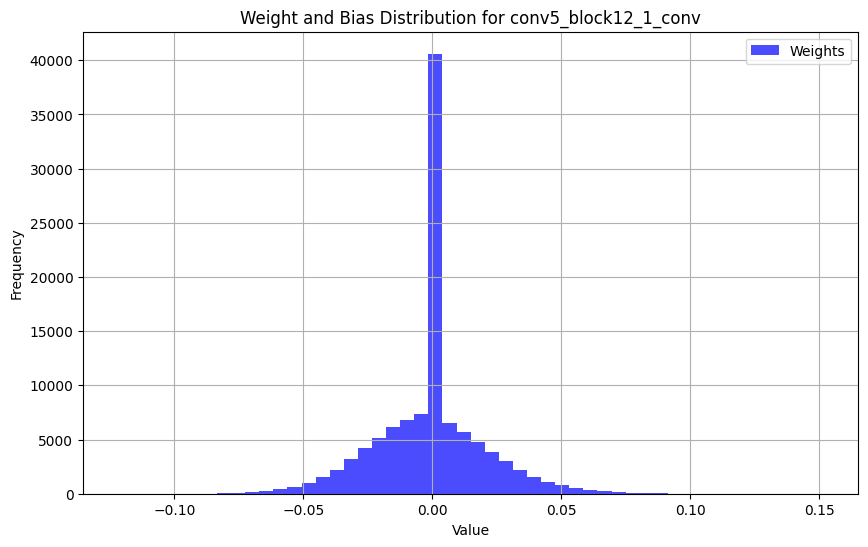

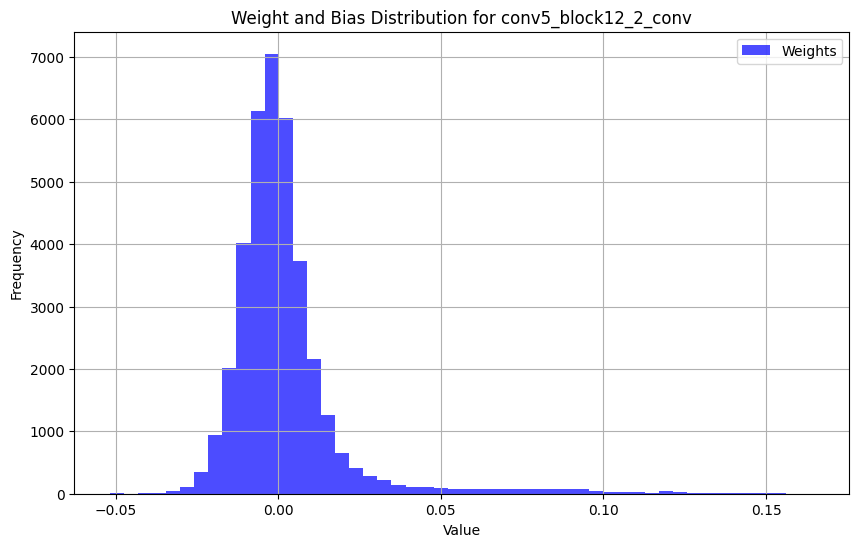

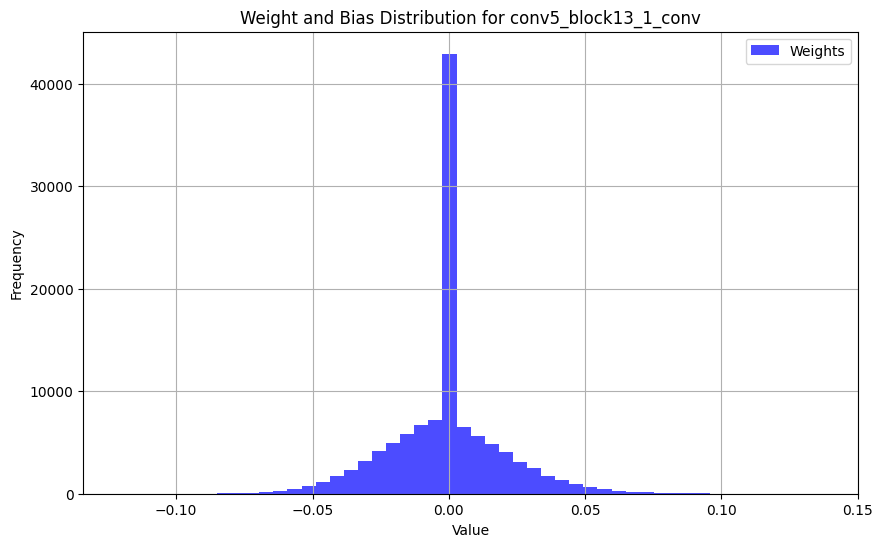

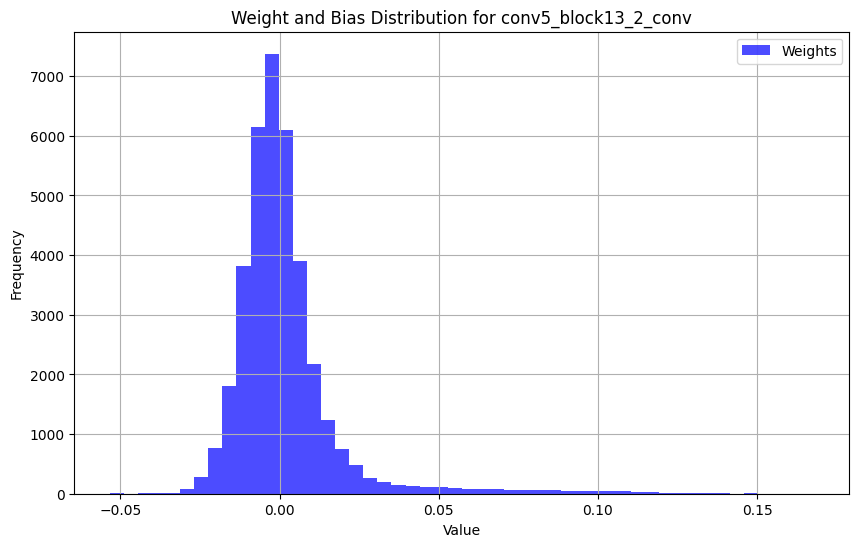

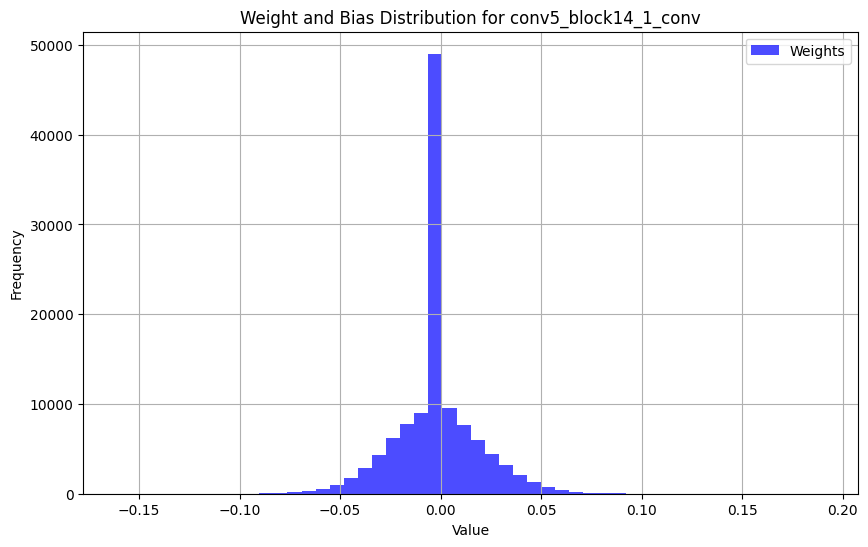

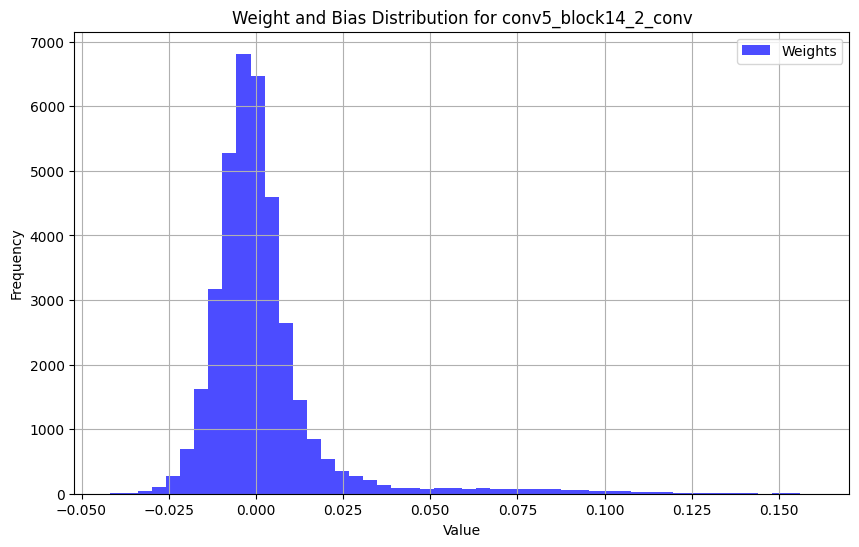

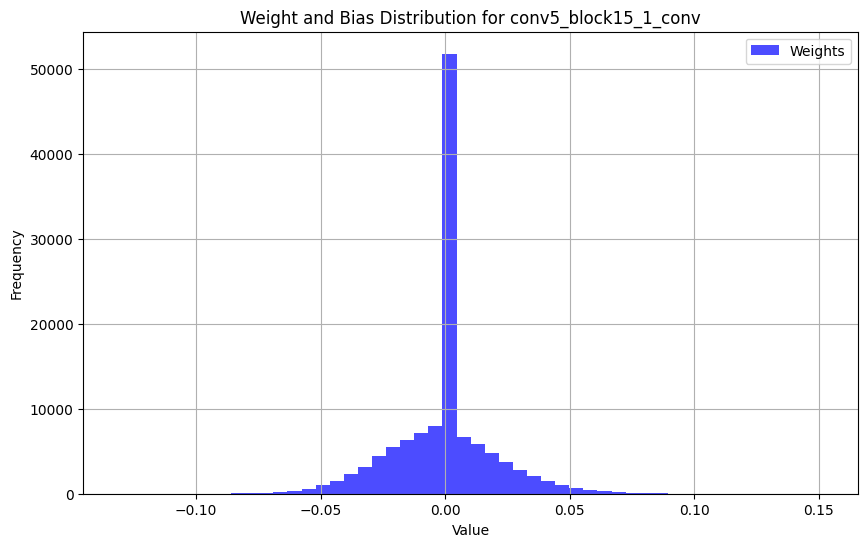

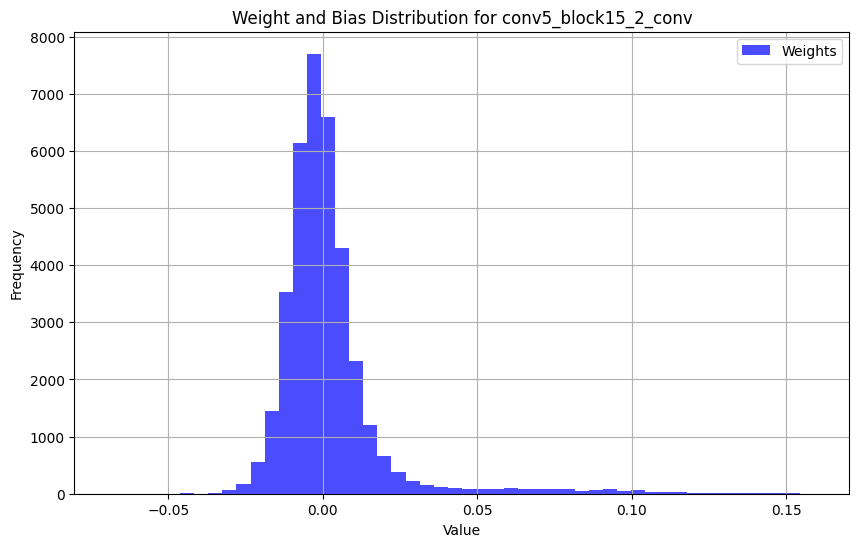

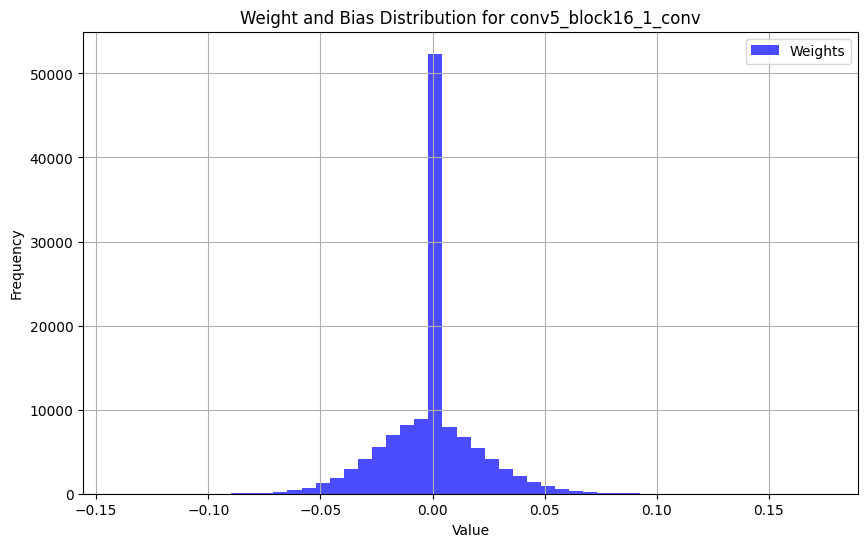

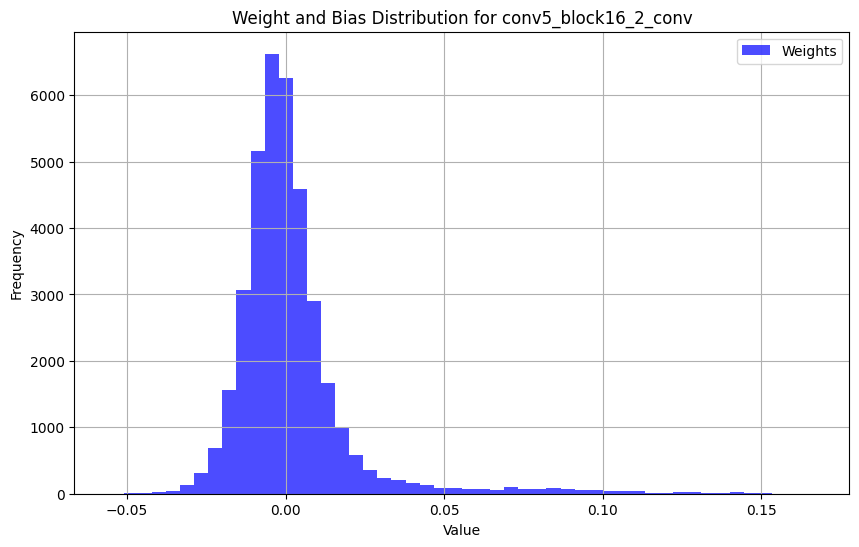

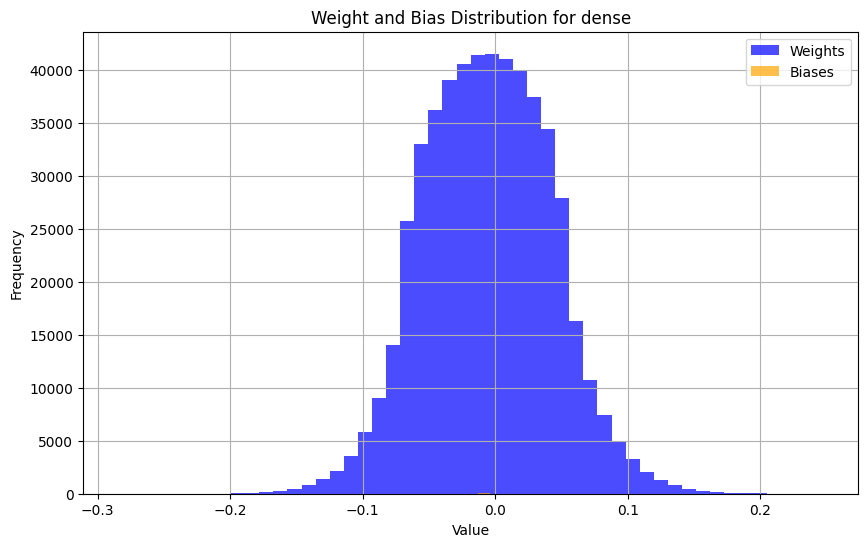

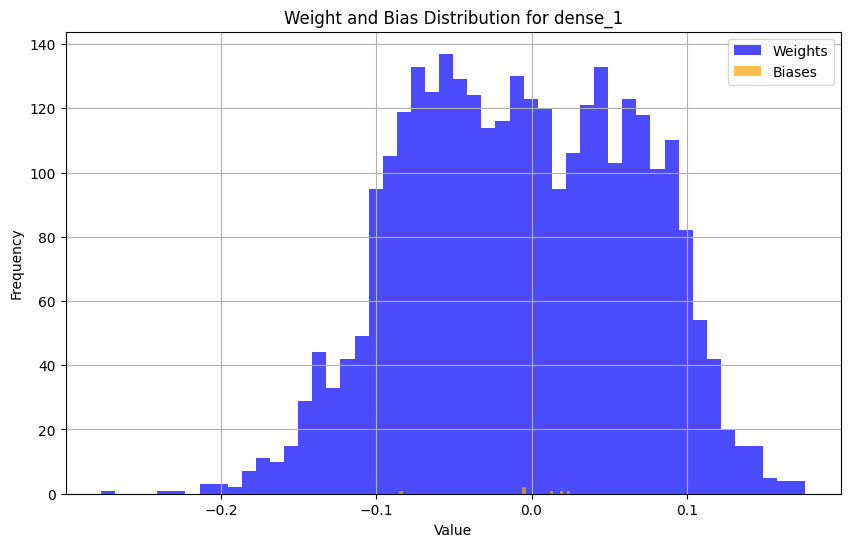

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

# ===================== Weights and Biases Distribution =====================
def plot_weights_distribution(model):
    for layer in model.layers:
        if isinstance(layer, (tf.keras.layers.Conv2D, tf.keras.layers.Dense)):
            weights = layer.get_weights()
            plt.figure(figsize=(10, 6))

            # Check if we have both weights and biases or just weights
            if len(weights) == 2:  # If both weights and biases are present
                weight_array, bias_array = weights
                plt.hist(weight_array.flatten(), bins=50, color='blue', alpha=0.7, label='Weights')
                plt.hist(bias_array.flatten(), bins=50, color='orange', alpha=0.7, label='Biases')
            elif len(weights) == 1:  # Only weights are present
                weight_array = weights[0]
                plt.hist(weight_array.flatten(), bins=50, color='blue', alpha=0.7, label='Weights')
                plt.title(f'Weight Distribution for {layer.name} (No Biases)')
            else:  # No weights or biases
                continue  # Skip to the next layer

            plt.title(f'Weight and Bias Distribution for {layer.name}')
            plt.xlabel('Value')
            plt.ylabel('Frequency')
            plt.legend()
            plt.grid()
            plt.show()

# Call the function
plot_weights_distribution(model)


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=class_names)
print(report)


              precision    recall  f1-score   support

   cardboard       0.17      0.18      0.17       362
     clothes       0.17      0.17      0.17       400
       glass       0.15      0.15      0.15       401
       paper       0.16      0.16      0.16       330
     plastic       0.17      0.16      0.16       383
       shoes       0.17      0.17      0.17       395

    accuracy                           0.16      2271
   macro avg       0.16      0.16      0.16      2271
weighted avg       0.16      0.16      0.16      2271

